# Prática Machine Learning 101

Fernando López Dou - Día 4/2/2024

## Practica ML

1. **Preparación de datos: División train/test**
   - Separar los datos en conjuntos de entrenamiento y prueba para validar la capacidad de generalización del modelo.

2. **Análisis exploratorio, por ejemplo:**
   a. Uso de `head`, `describe`, `dtypes`, etc., para obtener una comprensión básica de los datos.
   b. Identificación y manejo de valores atípicos (outliers).
   c. Análisis de la correlación entre las variables para detectar relaciones.

3. **Preprocesamiento:**
   a. Eliminación de variables redundantes o irrelevantes, utilizando métodos como selección mediante modelos de ensamble (Random Forest/Lasso), eliminación por alta correlación, o por un alto porcentaje de valores faltantes.
   b. Generación de nuevas variables (feature engineering) que puedan mejorar la capacidad predictiva de los modelos.

4. **Modelado:**
   a. Implementación de validación cruzada (cross validation) para asegurar la estabilidad del modelo.
   b. Evaluación del modelo, preferiblemente comparando varios modelos para identificar el más adecuado.

5. **Conclusión:**
   - Una conclusión escrita y reflexiva sobre el proceso de modelado, los resultados y las recomendaciones para pasos futuros o decisiones basadas en el modelo.


## 0. Básicos para la practica (Instalación librerias  y carga de los datos)
Para esta practica y según hemos seguido durante el módulo utilizaremos numpy, pandas, Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## 1. Preparación de datos: División train / test

In [2]:
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')

In [3]:
#Aplicamos el filtro de Madrid, ya que va ser nuestra zona de estudio.
full_df = full_df[full_df["City"]=="Madrid"]
print(f'Inputs placed in Madrid: {len(full_df)}')

Inputs placed in Madrid: 13207


In [4]:
#Ponemos variables con "_" en lugar de espacio
full_df.columns = full_df.columns.str.replace(' ', '_')

In [5]:
print(full_df.columns)

Index(['ID', 'Listing_Url', 'Scrape_ID', 'Last_Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences_Offered', 'Neighborhood_Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House_Rules',
       'Thumbnail_Url', 'Medium_Url', 'Picture_Url', 'XL_Picture_Url',
       'Host_ID', 'Host_URL', 'Host_Name', 'Host_Since', 'Host_Location',
       'Host_About', 'Host_Response_Time', 'Host_Response_Rate',
       'Host_Acceptance_Rate', 'Host_Thumbnail_Url', 'Host_Picture_Url',
       'Host_Neighbourhood', 'Host_Listings_Count',
       'Host_Total_Listings_Count', 'Host_Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood_Cleansed',
       'Neighbourhood_Group_Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart_Location', 'Country_Code', 'Country', 'Latitude', 'Longitude',
       'Property_Type', 'Room_Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed_Type', 'Amenities', 'Square_Feet', 'Price', 'Weekly_Price',
       'Month

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(full_df, test_size=0.20, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')
dft = pd.read_csv('./test.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10565, 89)
Dimensiones del dataset de test: (2642, 89)


/var/folders/rt/k4y9ctx51rq87bymcp3c17d00000gn/T/ipykernel_62612/1235225133.py:15: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./train.csv', sep=';', decimal='.')


Hemos cargado el dataset y hemos subdividido en proporción 80/20, de manera que podamos:

- Desarrollar un modelo que aprenda de una muestra significativa de datos y luego podamos evaluarlo con el porcentaje restante que no ha sido visto.
- Evitar el overfitting, ya que si utilizamos todo el conjunto de datos, el modelo puede aprender demasiado bien las características de la muestra dada, y luego no funcionar bien con datos nuevos.
- Medir su capacidad de generalización, que son las prestaciones en muestras no vistas previamente por el clasificador


## 2.Análisis exploratorio 


A partir de ahora vamos a trabajar con el dataframe de entrenamiento para realizar el proceso de análisis exploratorio de los datos. La idea es primero determinar y analizar la variable dependiente, en este caso el precio, y luego se revisarán las variables independientes.


### Revisión Preliminar: 
Realizamos una visualización rapida para ver los datos cargados correctamente y comprobar entre el tipo de variables las estadisticas descriptivas y tipos de datos. Para ello usamos "head", "info" y "Describe".

In [8]:
df.head(5)


,ID,Listing_Url,Scrape_ID,Last_Scraped,Name,Summary,Space,Description,Experiences_Offered,Neighborhood_Overview,...,Review_Scores_Communication,Review_Scores_Location,Review_Scores_Value,License,Jurisdiction_Names,Cancellation_Policy,Calculated_host_listings_count,Reviews_per_Month,Geolocation,Features
0,13270355,https://www.airbnb.com/rooms/13270355,20170407214119,2017-04-08,Madrid Center Sunny Appartment,"Places of interest: CaixaForum Madrid, Barrio ...","Nice appartment in the center of Madrid, with ...","Places of interest: CaixaForum Madrid, Barrio ...",none,NaN,...,10.0,9.0,9.0,NaN,NaN,flexible,2.0,7.63,"40.4110160191,-3.69965649095","Host Has Profile Pic,Host Identity Verified,Re..."
1,8991818,https://www.airbnb.com/rooms/8991818,20170407214119,2017-04-08,ROOMS IN MADRID,ROOMS FOR RENT IN MADRID. FOR ERASMUS STUDENS ...,NaN,ROOMS FOR RENT IN MADRID. FOR ERASMUS STUDENS ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4247850244,-3.65830048851","Host Has Profile Pic,Requires License"
2,5310107,https://www.airbnb.com/rooms/5310107,20170407214119,2017-04-08,Attic with terrace Madrid city center -WIFI- cozy,Attic with a marvellous terrace on top. WIFI V...,Home has been reciently reformed. There plent...,Attic with a marvellous terrace on top. WIFI V...,none,"Right in the city center of Madrid, at Barrio ...",...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,2.28,"40.4151910492,-3.69859147994","Host Has Profile Pic,Host Identity Verified,Is..."
3,16144069,https://www.airbnb.com/rooms/16144069,20170407214119,2017-04-08,1.- Studio Private ÓPERA/SOL. With Balcony,"This cozy studio of 18mts 2, is completely ref...",NaN,"This cozy studio of 18mts 2, is completely ref...",none,Calle muy privilegiada y céntrica (Calle del A...,...,9.0,10.0,9.0,NaN,NaN,moderate,6.0,2.97,"40.4189857656,-3.70727564846","Host Has Profile Pic,Is Location Exact,Require..."
4,13445117,https://www.airbnb.com/rooms/13445117,20170407214119,2017-04-08,Habitación para una persona o dos,Mi alojamiento es bueno para parejas y aventur...,NaN,Mi alojamiento es bueno para parejas y aventur...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,0.10,"40.4058653456,-3.67647489861","Host Has Profile Pic,Host Identity Verified,Is..."


Como vemos en una primera exploración tenemos muchas variables (89) de las cuales se hay variables categoricas y análiticas. Utilizando la variable la función info ya que nos da toda la información de un solo comando, cantidad de variables no nulos, y el tipo de variables.Como estamos en train, sabemos que shape de la muestra es de 10565 rows * 89 Columnas

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              10565 non-null  int64  
 1   Listing_Url                     10565 non-null  object 
 2   Scrape_ID                       10565 non-null  int64  
 3   Last_Scraped                    10565 non-null  object 
 4   Name                            10565 non-null  object 
 5   Summary                         10182 non-null  object 
 6   Space                           7717 non-null   object 
 7   Description                     10560 non-null  object 
 8   Experiences_Offered             10565 non-null  object 
 9   Neighborhood_Overview           6649 non-null   object 
 10  Notes                           3989 non-null   object 
 11  Transit                         6592 non-null   object 
 12  Access                          

In [10]:
#Nos damos cuenta que el ZIPCODE esta incluido como un object, en lugar de un número, por ello procedemos a transformarlo.

df['Zipcode'] = pd.to_numeric(df['Zipcode'], errors='coerce').astype('Int64')

In [11]:
pd.set_option('display.precision', 2) #Incluimos que se van solo dos decimales
pd.set_option('display.float_format', '{:.2f}'.format) #Los números de dos decimales tendrán en formato decimal.
df.describe().T

#Usamos la traspuesta para que se pueda leer mejor los datos

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10565.00,10421609.80,5495137.25,18628.00,5938004.00,11551340.00,15336831.00,18109842.00
Scrape_ID,10565.00,20170407214119.00,4.34,20170407214119.00,20170407214119.00,20170407214119.00,20170407214119.00,20170407214119.00
Host_ID,10565.00,37516076.96,34370589.71,17453.00,7657596.00,27611473.00,57614931.00,124753355.00
Host_Response_Rate,9225.00,94.84,15.35,0.00,100.00,100.00,100.00,100.00
Host_Acceptance_Rate,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host_Listings_Count,10563.00,9.48,26.59,0.00,1.00,2.00,5.00,265.00
Host_Total_Listings_Count,10563.00,9.48,26.59,0.00,1.00,2.00,5.00,265.00
Zipcode,10211.00,28028.57,2545.57,2015.00,28005.00,28012.00,28017.00,280013.00
Latitude,10565.00,40.42,0.02,40.33,40.41,40.42,40.43,40.51
Longitude,10565.00,-3.70,0.02,-3.84,-3.71,-3.70,-3.69,-3.57


A priori vemos que muchas de las 89 variables que tenemos pueden no ser de gran infomación para el modelo que queremos desarrollar como por ejemplo "Scrape_ID", "URL" o las fotos por ejemplo.Tambien apreciamos que hay bastante variables con valores NaN asi como mucha diferencia entre su media y sus valores maximos y mínimos.Por ultimo tambien vemos errores por ejemplo en los códigos postales y en el "info" muchas variables nulas.

Pero como no sabemos como se comportan las variables entre si y su distribución, asi como las posibles relaciones lineales entre variables, hacemos una primera revisión de dispersión y de correlación antes de continuar seleccionando las variables del módelo.


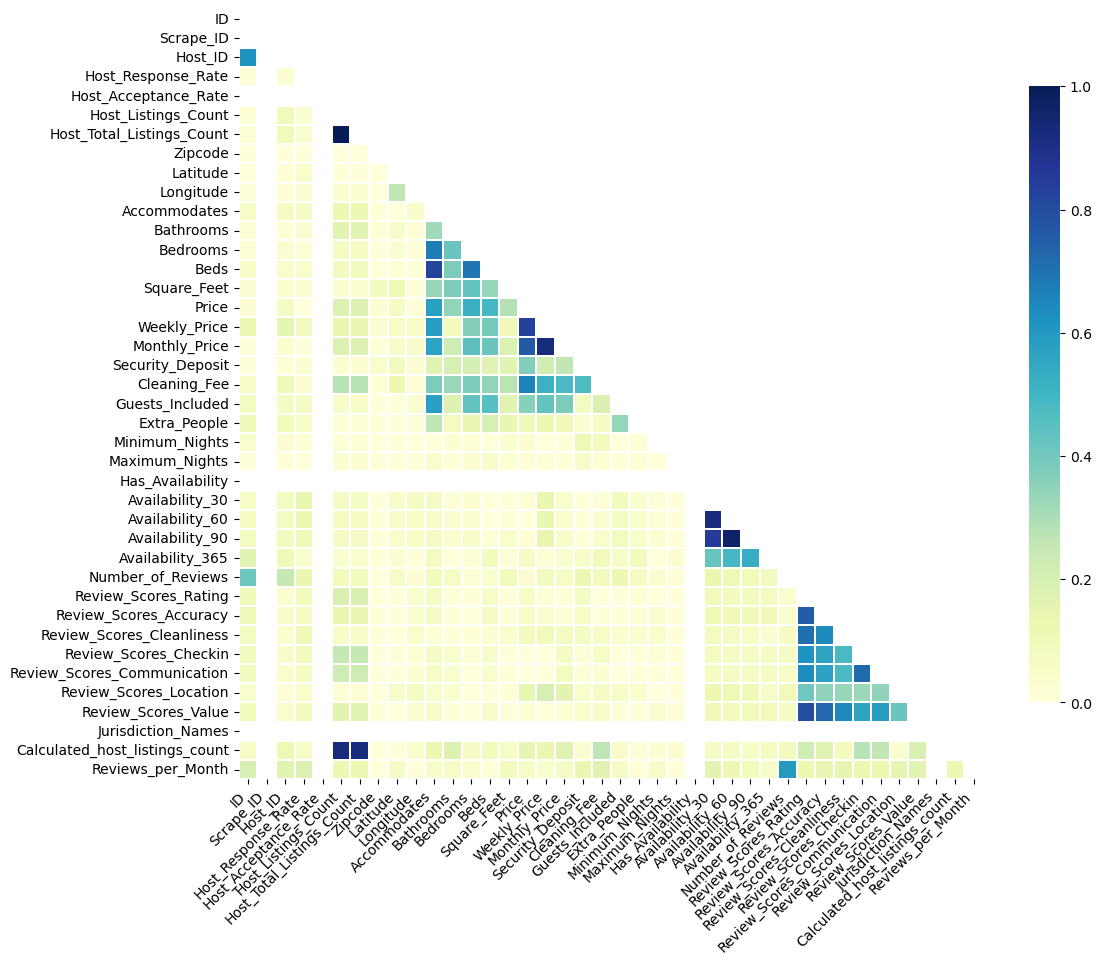

In [12]:
import seaborn as sns

# Seleccionar solo columnas numéricas para el cálculo de la correlación
df_numeric = df.select_dtypes(include=[np.number])

# Computar la matriz de correlación (absoluta para obtener valores positivos)
corr = np.abs(df_numeric.corr())

# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibujar el heatmap con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

# Ajustar el tamaño de las etiquetas para mayor claridad
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Una vez revisados este breve analisis exploratorio, vemos con que variables queremos trabajar, son las que a priori estan correlacionadas, que son las que hacen referencia a las caracteristicas del inmueble, su disponibilidad, su Score y Precio.

### Columnas Seleccionadas

- **ID**
    - No lo utilizaremos en la selección, solo se mantiene como referencia.
- **Host_ID**
    - No lo utilizaremos en la selección, solo se mantiene para tener una referencia.
- **Neighbourhood Group Cleansed**
- **Zipcode**
    - Otros datos del dataset, como ciudad, geolocalización, etc., también están contenidos en Zipcode.
- **Property_Type**
- **Room_Type**
- **Accommodates**
- **Bathrooms**
- **Bedrooms**
- **Beds**
- **Bed_Type**
- **Price**
    - Es nuestra variable objetivo, y rechazamos otros valores de precio mensual o anual, ya que buscamos el precio diario.
- **Cleaning_Fee**
- **Guests_Included**
- **Minimum_Nights**
- **Availability_30**
- **Number_of_Reviews**
- **Review_Scores_Rating**




Realizamos la selección de las variables de nuestro Módelo.

In [13]:
columns_to_keep = ['ID','Host_ID', 'Neighbourhood_Group_Cleansed', 'Zipcode',
       'Property_Type', 'Room_Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed_Type', 'Price','Cleaning_Fee', 'Minimum_Nights', 'Availability_30',
       'Number_of_Reviews','Review_Scores_Rating', 'Guests_Included']

cols = len(columns_to_keep)
print(f'Número de columnas totales = {cols}')

Número de columnas totales = 18


In [14]:

columns_to_remove = list(set(df.columns.values) -  set(columns_to_keep))
print(f'Número de columnas a eliminar = {len(columns_to_remove)}')

Número de columnas a eliminar = 71


In [15]:
df = df.drop(columns=columns_to_remove)
# Imprime las columnas del DataFrame actualizado para confirmar
print("Columnas después de la eliminación:", df.columns)

Columnas después de la eliminación: Index(['ID', 'Host_ID', 'Neighbourhood_Group_Cleansed', 'Zipcode',
       'Property_Type', 'Room_Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed_Type', 'Price', 'Cleaning_Fee', 'Guests_Included',
       'Minimum_Nights', 'Availability_30', 'Number_of_Reviews',
       'Review_Scores_Rating'],
      dtype='object')


Una vez extraidas las variables que vamos a utilizar vamos hacer un check de que se ha cargado correctamente.

In [16]:
df.head()

,ID,Host_ID,Neighbourhood_Group_Cleansed,Zipcode,Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed_Type,Price,Cleaning_Fee,Guests_Included,Minimum_Nights,Availability_30,Number_of_Reviews,Review_Scores_Rating
0,13270355,74763325,Centro,<NA>,Apartment,Entire home/apt,4,1.00,1.00,1.00,Real Bed,55.00,NaN,1,1,1,72,88.00
1,8991818,46969485,Ciudad Lineal,28017,House,Private room,1,1.00,1.00,1.00,Real Bed,21.00,NaN,1,1,30,0,NaN
2,5310107,27508261,Centro,28014,Apartment,Entire home/apt,4,1.00,2.00,4.00,Real Bed,110.00,50.00,4,2,11,58,93.00
3,16144069,105344430,Centro,28013,Apartment,Entire home/apt,2,1.00,0.00,1.00,Real Bed,39.00,NaN,1,2,1,11,87.00
4,13445117,49509071,Retiro,28007,Apartment,Private room,2,2.00,1.00,1.00,Real Bed,500.00,NaN,1,1,29,1,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10565 non-null  int64  
 1   Host_ID                       10565 non-null  int64  
 2   Neighbourhood_Group_Cleansed  10565 non-null  object 
 3   Zipcode                       10211 non-null  Int64  
 4   Property_Type                 10565 non-null  object 
 5   Room_Type                     10565 non-null  object 
 6   Accommodates                  10565 non-null  int64  
 7   Bathrooms                     10523 non-null  float64
 8   Bedrooms                      10545 non-null  float64
 9   Beds                          10522 non-null  float64
 10  Bed_Type                      10565 non-null  object 
 11  Price                         10558 non-null  float64
 12  Cleaning_Fee                  6256 non-null   float64
 13  G

Movemos la variable objetivo a la primera columna por practicidad

In [18]:
#Muevo "Price" a la primera columna:
df = df.set_index('Price').reset_index()

#Compruebo que se ha movido correctamente
df.head(2).T


,0,1
Price,55.00,21.00
ID,13270355,8991818
Host_ID,74763325,46969485
Neighbourhood_Group_Cleansed,Centro,Ciudad Lineal
Zipcode,<NA>,28017
Property_Type,Apartment,House
Room_Type,Entire home/apt,Private room
Accommodates,4,1
Bathrooms,1.00,1.00
Bedrooms,1.00,1.00


In [19]:
#Analizo los datos de la variable objetivo
df['Price'].describe().T

count   10558.00
mean       65.77
std        56.35
min         9.00
25%        31.00
50%        52.00
75%        80.00
max       875.00
Name: Price, dtype: float64

(10565,)

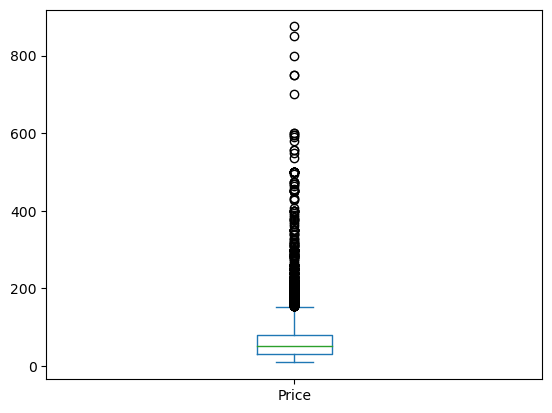

In [20]:
#Hacemos el Plotbox de la variable objetivo.
df['Price'].plot.box()
df['Price'].shape

Viendo el Boxplot de la variable objetivo "price", vemos lo siguiente:

* El rango intercuantilico es pequeña en comparación con el rango total de datos, lo que nos dice que la mayoria de los valores se encuentran dentro de un valor mas estrecho.
* La mediana (Linea verde) nos dice que esta cerca del cuartil inferior, lo que supone que la distribución esta sesgado a los valores mas bajos.
* Outliers, A ojo, parece que hay una cantidad significativa de valores por encima del Tercer cuartil.
* Estos Outliers, en datos sobre vivienda o similares (p.e datos financieros) es común encontrar una distribucón con una cola pesada hacia los valores + altos, reflejo del mercado inmobiliario.
* Para ver cuanto pesan estos datos vamos a ver el nº de valores que estan por encima del bigote superior del boxplot para saber si estamos desviados.

In [21]:
# Calcular el primer y tercer cuartil (Q1 y Q3).
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calcular el rango intercuartílico (IQR).
IQR = Q3 - Q1

# Calcular el bigote superior (el valor máximo en un boxplot antes de considerar puntos como outliers).
bigote_superior = Q3 + 1.5 * IQR

# Contar cuántos valores de 'Price' están por encima del bigote superior.
valores_por_encima_bigote_superior = df[df['Price'] > bigote_superior].shape[0]

print(f"Número de valores de 'Price' por encima del bigote superior: {valores_por_encima_bigote_superior}")


Número de valores de 'Price' por encima del bigote superior: 520


Vemos que estos valores no son una muestra muy grande, ya que supones < 5% de la muestra de los precios (10.565)

Ahora vamos a ver la distribución de la variable objetivo para ver como se comporta.

Text(0, 0.5, 'Frecuencia')

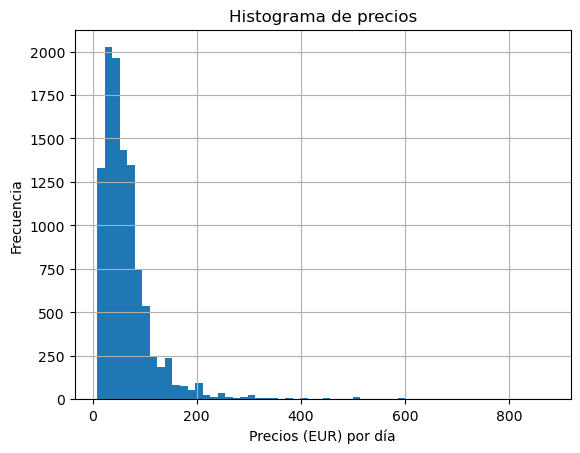

In [22]:
df['Price'].hist(log=False, density=False, bins= 60)
plt.title("Histograma de precios")
plt.xlabel("Precios (EUR) por día")
plt.ylabel("Frecuencia")

Vemos que la distribución tiene un sesgo positivo hacia la derecha, ya que la mayoria de los valores estan en la izquierda, y hay una larga cola a la derecha. Debido a Outliers, o bien valores mas altos en comparación al resto.

Tiene sentido ya que generalmente Airbnb esta orientado a personas que quieren buscar lugares baratos para alojarse periodos cortos, intuitivamente esto coincide con los datos. Pero tambien hay que tener en cuenta, que hay otros alquileres de mayor valor (fincas, casas rurales..) se alquilan enteros por lo que aumenta
Con ello concluimos que no sigue una distribución normal.

Text(0, 0.5, 'Frecuencia')

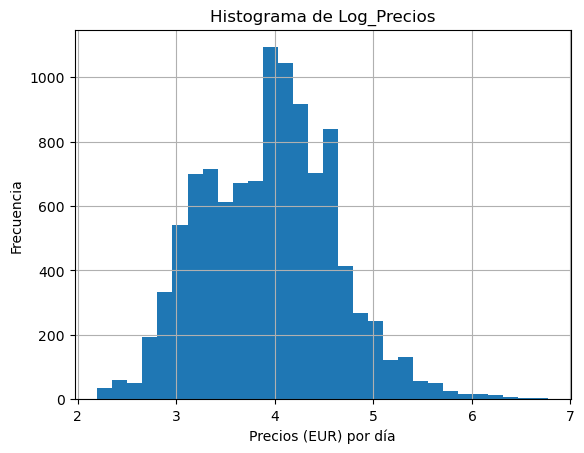

In [23]:
df['Price_Log'] = np.log(df['Price'])
df['Price_Log'].hist(log=False, density=False, bins= 30)
plt.title("Histograma de Log_Precios")
plt.xlabel("Precios (EUR) por día")
plt.ylabel("Frecuencia")

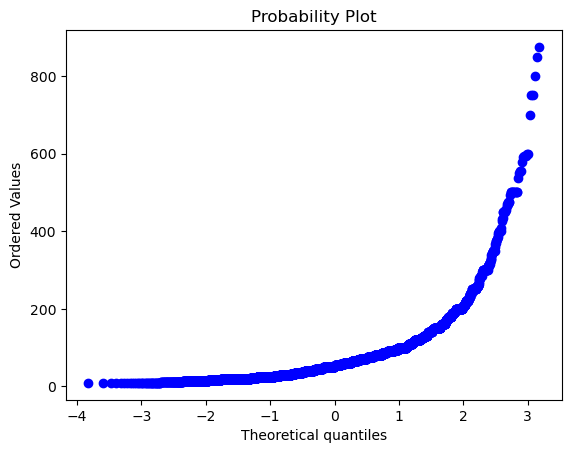

In [24]:
#Plot (QQ Plot) para la variable 'Price' 
from scipy import stats
import pylab
stats.probplot(df['Price'], dist="norm", plot=pylab)
pylab.show()

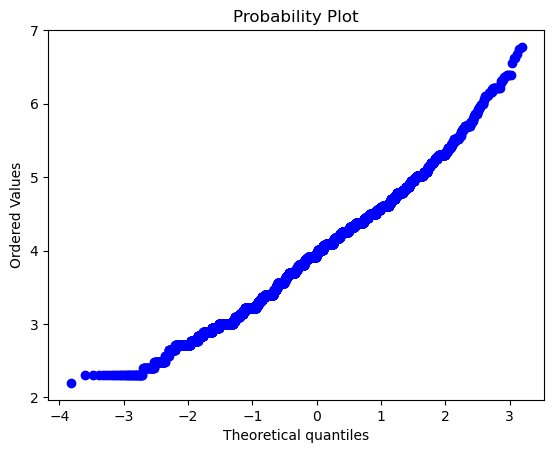

In [25]:
#Plot (QQ Plot) para la variable 'Price_Log' 
stats.probplot(df['Price_Log'], dist="norm", plot=pylab)
pylab.show()

Vemos que, tras la transformación, la distribución del precio se asemeja a la de una distribución normal. En los gráficos Q-Q se observa que la transformación logarítmica de la variable de respuesta da lugar a una distribución más parecida a la normal. Esta validación de la normalidad es importante para ajustarse a los supuestos de los modelos de regresión lineal.

Ahora vamos a realizar el histograma del resto de variables, la relación con las demas variables asi como de bloxplot para el resto de variables.

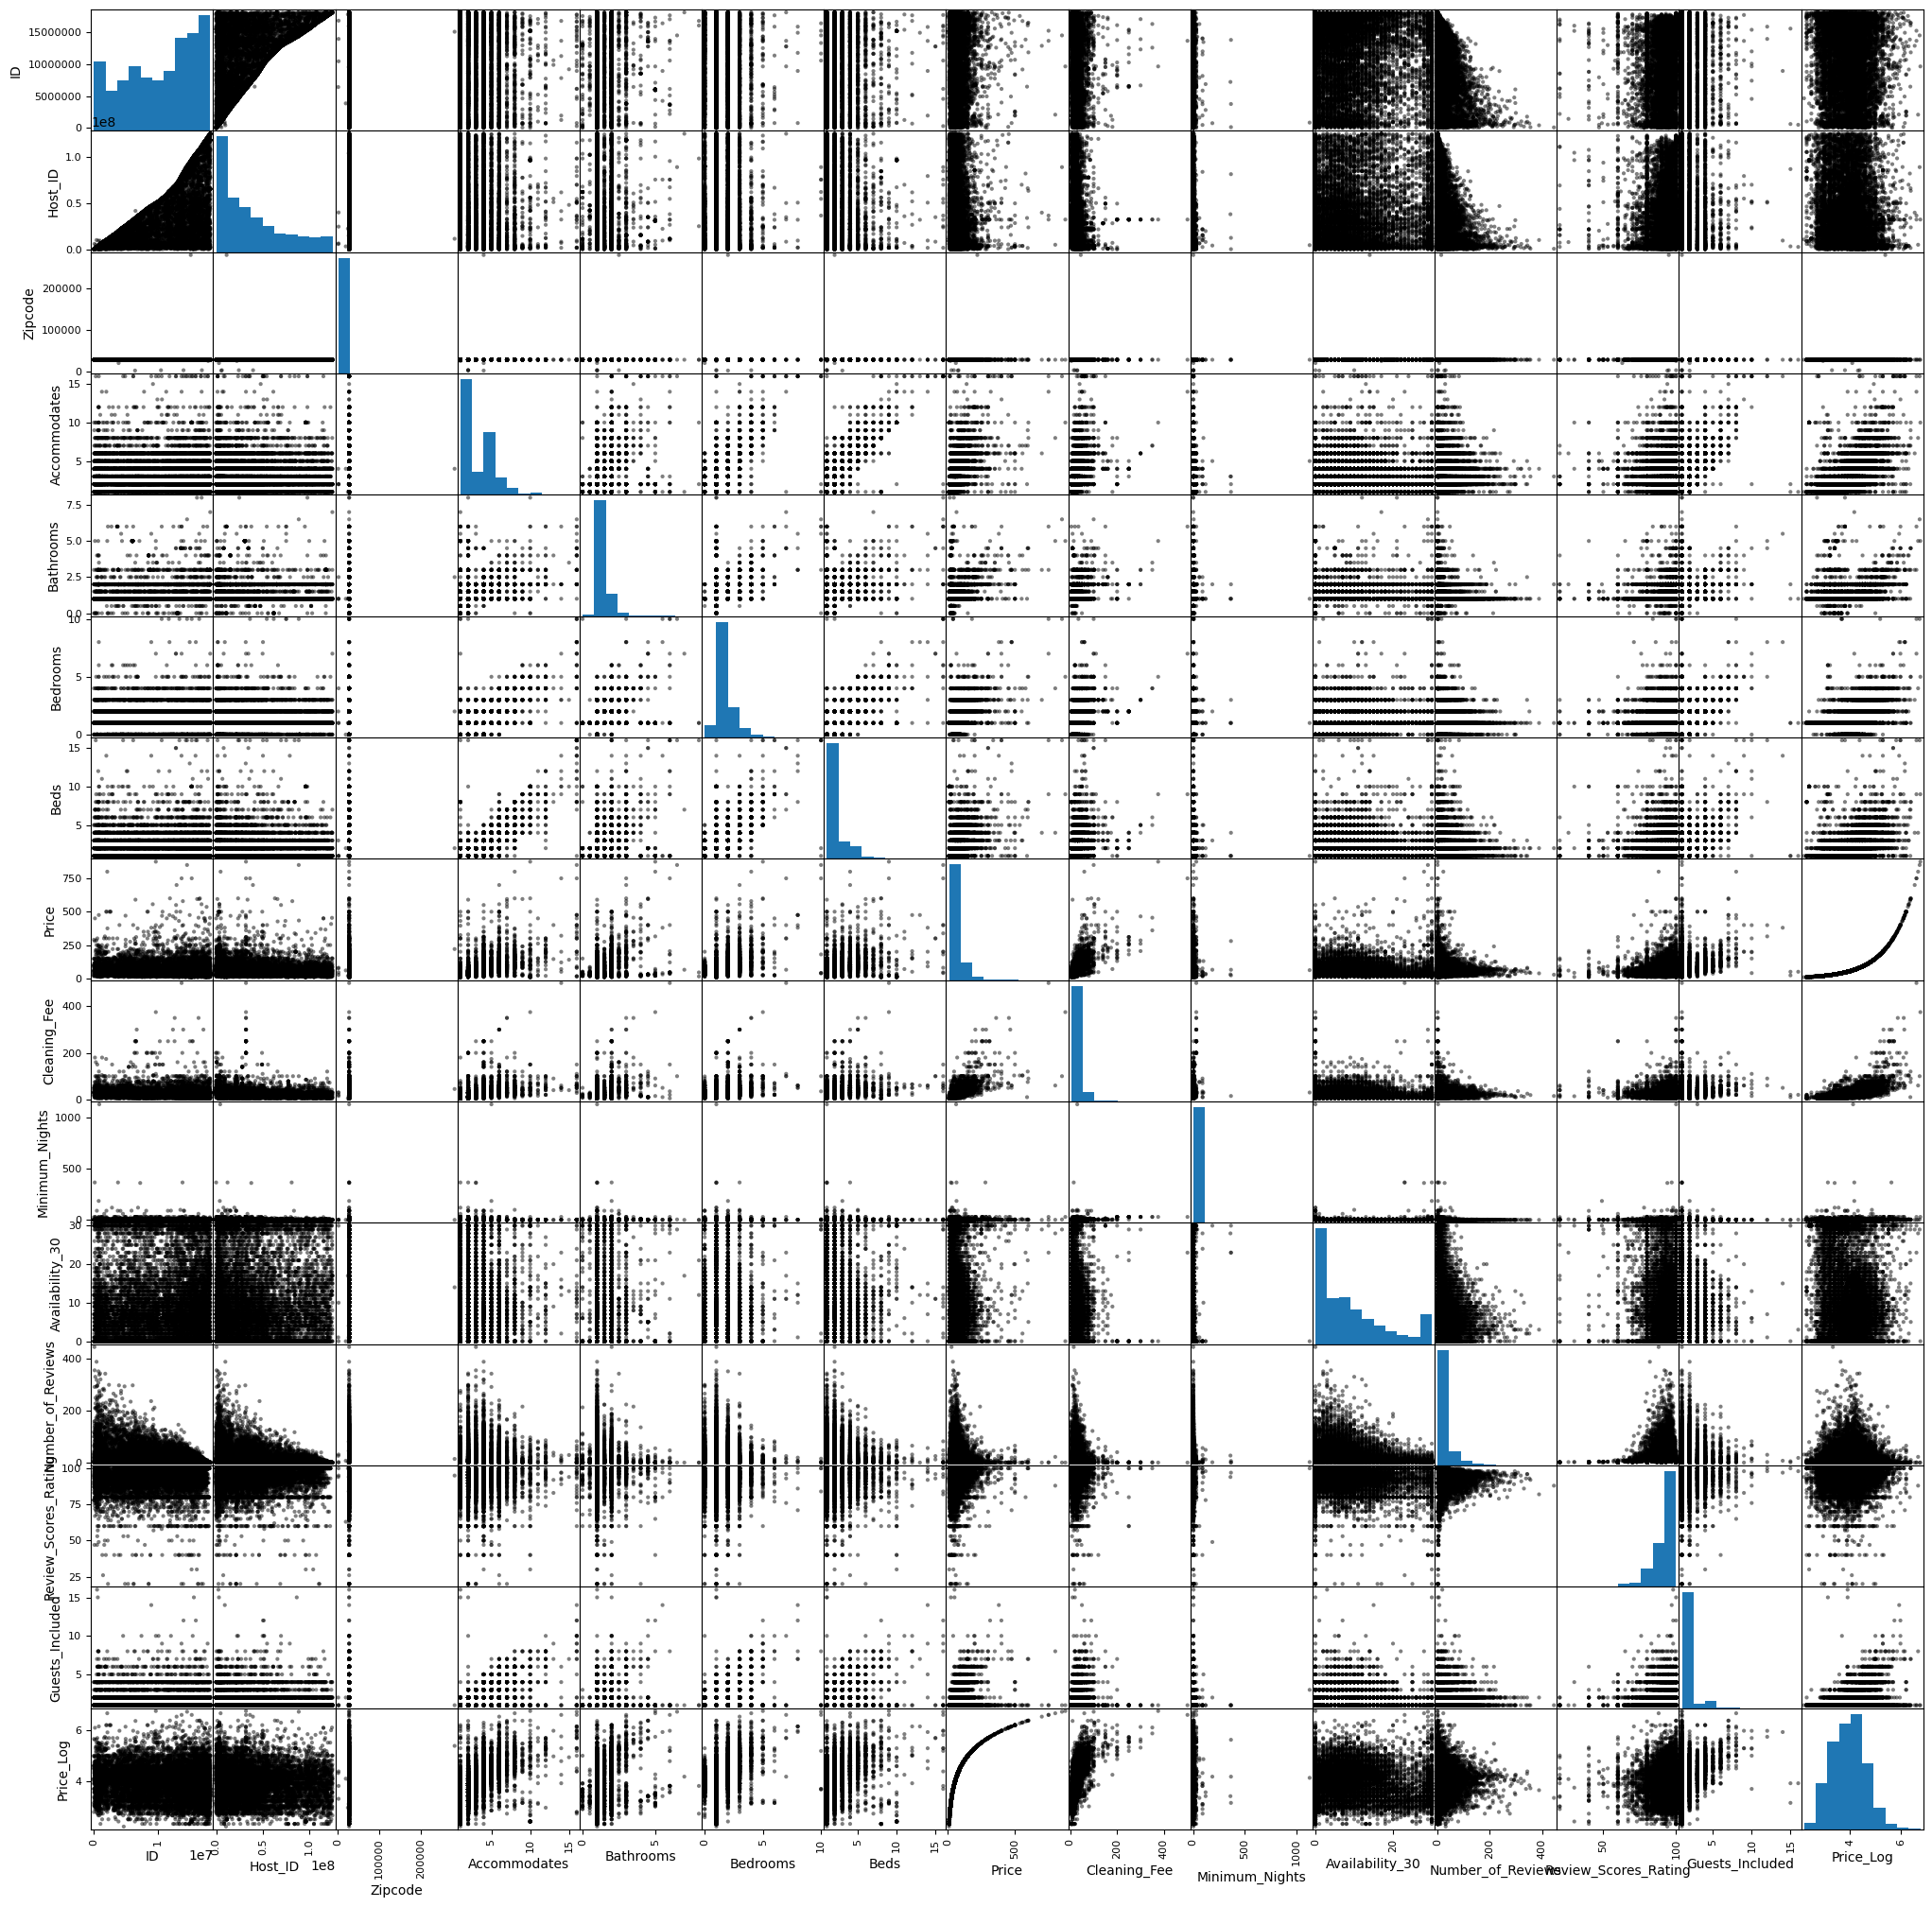

In [26]:
from pandas.plotting import scatter_matrix
matrix_cols = ['ID','Host_ID', 'Neighbourhood_Group_Cleansed', 'Zipcode',
              'Property_Type', 'Room_Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
             'Beds', 'Bed_Type', 'Price','Cleaning_Fee', 'Minimum_Nights', 'Availability_30',
        'Number_of_Reviews','Review_Scores_Rating', 'Guests_Included','Price_Log']
axs = scatter_matrix(df[matrix_cols], figsize=(25, 25), color='black')

Vemos según la matriz que hemso obtenido, parece que no hay ningún problema evidente entre predictores.Parece existir una relación entre "Acomodates","Bedroom","Beds" y "Guest_Included".

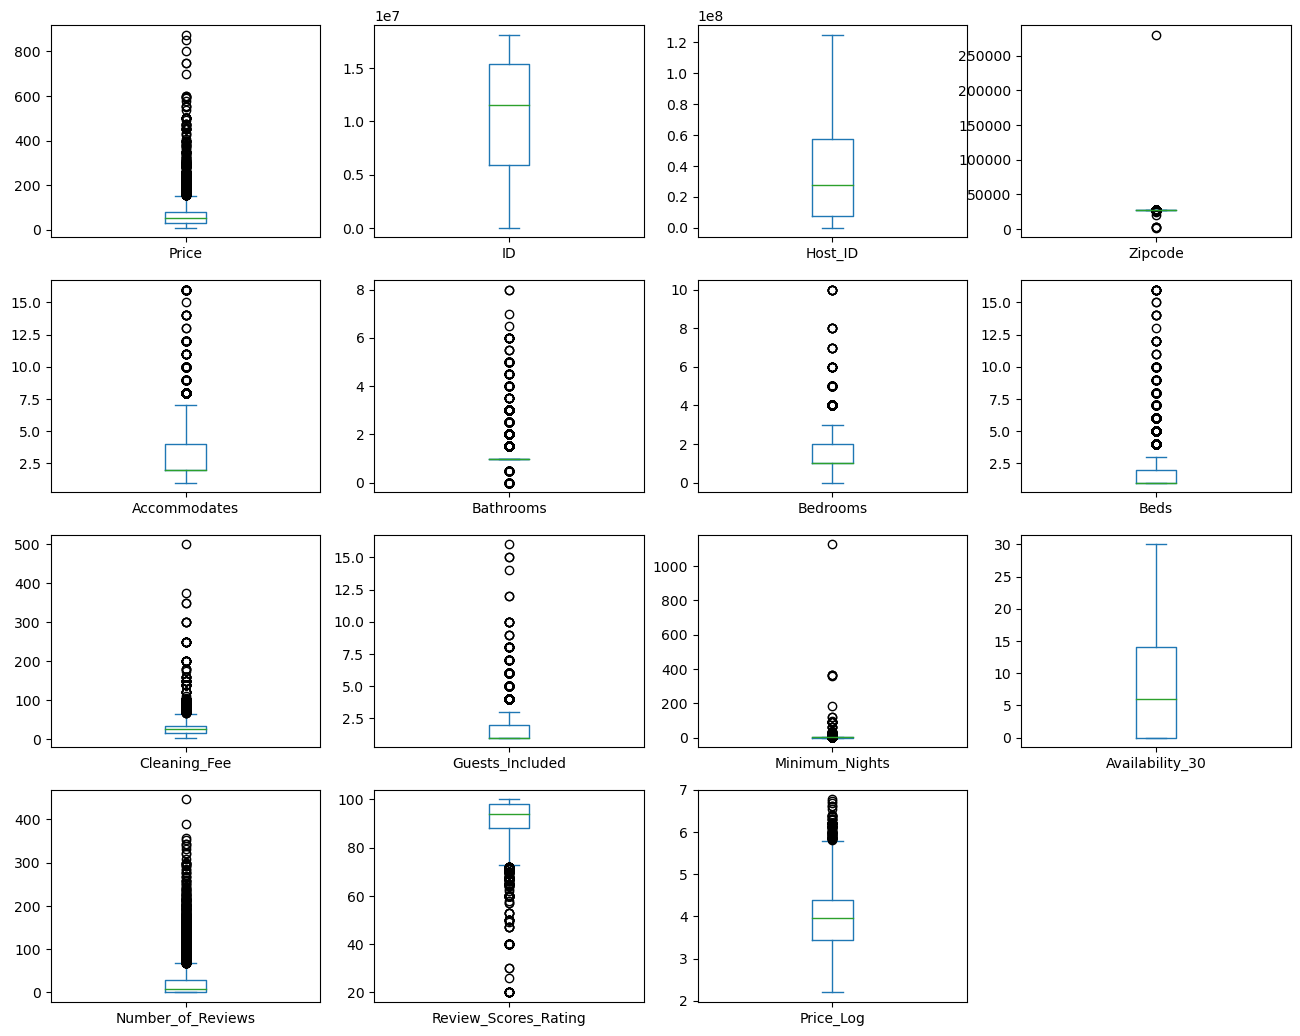

In [27]:
df.plot(kind='box', subplots=True, layout=(5, 4), sharex=False, sharey=False, figsize=[16, 16])
plt.show()


Con los bloxplot, vemos diferentes punto que tenemos que tratar de solventar:

* Zipcode -> Claramente debe haber un Outlier
* Minimum_Nigth -> Claramente debe haber otro Outlier

## Correlación

In [28]:
df_numeric = df.select_dtypes(include=[np.number]) # Filtra las columnas numéricas
corr = np.abs(df_numeric.corr()) # Calcula la matriz de correlación
corr

,Price,ID,Host_ID,Zipcode,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning_Fee,Guests_Included,Minimum_Nights,Availability_30,Number_of_Reviews,Review_Scores_Rating,Price_Log
Price,1.00,0.03,0.07,0.03,0.58,0.35,0.52,0.49,0.66,0.36,0.03,0.02,0.03,0.06,0.85
ID,0.03,1.00,0.62,0.01,0.06,0.01,0.02,0.06,0.05,0.08,0.04,0.05,0.42,0.11,0.07
Host_ID,0.07,0.62,1.00,0.00,0.07,0.02,0.03,0.04,0.10,0.07,0.03,0.08,0.25,0.04,0.11
Zipcode,0.03,0.01,0.00,1.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.02
Accommodates,0.58,0.06,0.07,0.00,1.00,0.32,0.68,0.82,0.38,0.58,0.00,0.07,0.09,0.07,0.62
Bathrooms,0.35,0.01,0.02,0.02,0.32,1.00,0.42,0.38,0.33,0.18,0.02,0.02,0.06,0.01,0.21
Bedrooms,0.52,0.02,0.03,0.01,0.68,0.42,1.00,0.69,0.38,0.43,0.01,0.03,0.02,0.01,0.46
Beds,0.49,0.06,0.04,0.00,0.82,0.38,0.69,1.00,0.35,0.46,0.00,0.00,0.04,0.06,0.45
Cleaning_Fee,0.66,0.05,0.10,0.01,0.38,0.33,0.38,0.35,1.00,0.19,0.09,0.01,0.09,0.00,0.59
Guests_Included,0.36,0.08,0.07,0.00,0.58,0.18,0.43,0.46,0.19,1.00,0.00,0.09,0.12,0.01,0.42


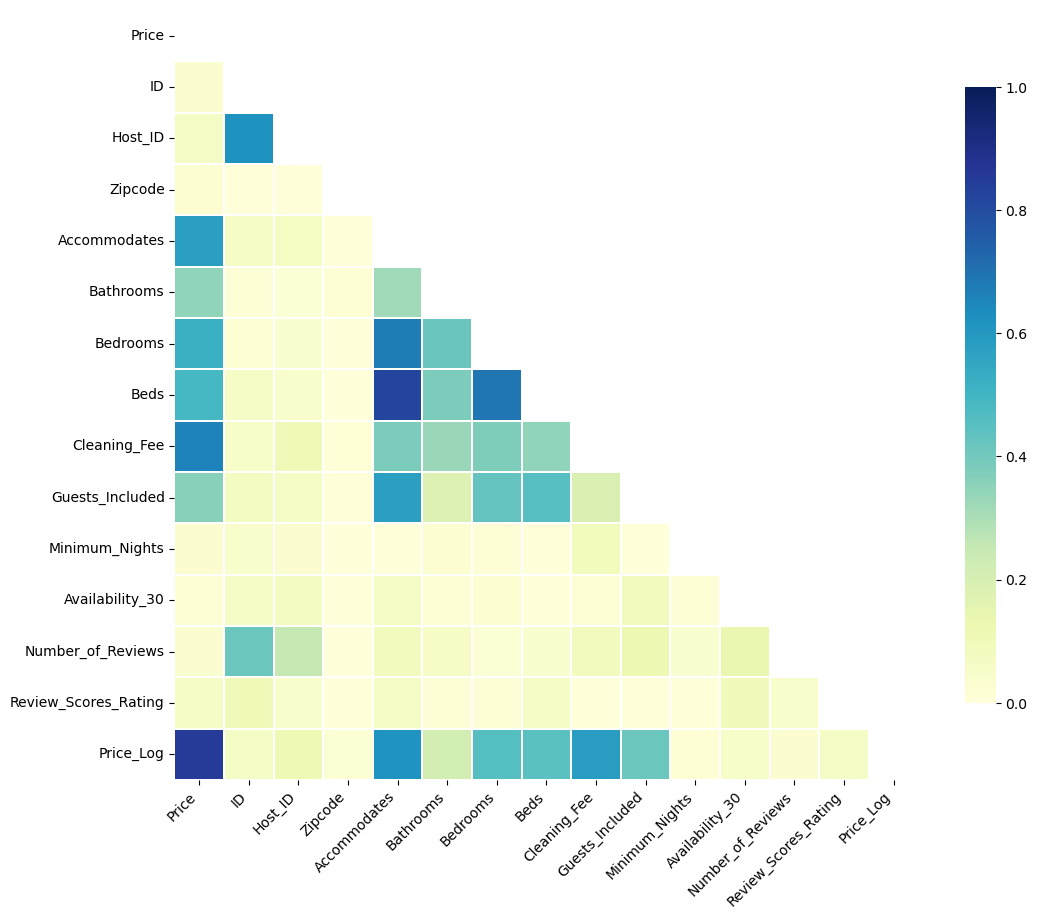

In [29]:
# Seleccionar solo columnas numéricas para el cálculo de la correlación
df_numeric = df.select_dtypes(include=[np.number])

# Computar la matriz de correlación (absoluta para obtener valores positivos)
corr = np.abs(df_numeric.corr())

# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibujar el heatmap con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

# Ajustar el tamaño de las etiquetas para mayor claridad
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Con la matriz de Correlación vemos que las variables Beds y Accomadtes estan muy correlacionadas, por lo que procedemos a eliminar una del dataset.

## Preprocesamiento y Modelado

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price                         10558 non-null  float64
 1   ID                            10565 non-null  int64  
 2   Host_ID                       10565 non-null  int64  
 3   Neighbourhood_Group_Cleansed  10565 non-null  object 
 4   Zipcode                       10211 non-null  Int64  
 5   Property_Type                 10565 non-null  object 
 6   Room_Type                     10565 non-null  object 
 7   Accommodates                  10565 non-null  int64  
 8   Bathrooms                     10523 non-null  float64
 9   Bedrooms                      10545 non-null  float64
 10  Beds                          10522 non-null  float64
 11  Bed_Type                      10565 non-null  object 
 12  Cleaning_Fee                  6256 non-null   float64
 13  G

In [31]:
new_columns_to_remove = ['Accommodates']

columns_to_remove.extend(new_columns_to_remove)
df.drop(new_columns_to_remove, axis=1, inplace=True)
df.shape

(10565, 18)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price                         10558 non-null  float64
 1   ID                            10565 non-null  int64  
 2   Host_ID                       10565 non-null  int64  
 3   Neighbourhood_Group_Cleansed  10565 non-null  object 
 4   Zipcode                       10211 non-null  Int64  
 5   Property_Type                 10565 non-null  object 
 6   Room_Type                     10565 non-null  object 
 7   Bathrooms                     10523 non-null  float64
 8   Bedrooms                      10545 non-null  float64
 9   Beds                          10522 non-null  float64
 10  Bed_Type                      10565 non-null  object 
 11  Cleaning_Fee                  6256 non-null   float64
 12  Guests_Included               10565 non-null  int64  
 13  M

Ahora vamos eliminar los datos NaN del Dataset, asi como arreglar los outliers de las variables analiticas.

In [33]:
for col in df.columns:
    print(f'{col}, Nº valores vacios: {df[col].isnull().sum()}')

Price, Nº valores vacios: 7
ID, Nº valores vacios: 0
Host_ID, Nº valores vacios: 0
Neighbourhood_Group_Cleansed, Nº valores vacios: 0
Zipcode, Nº valores vacios: 354
Property_Type, Nº valores vacios: 0
Room_Type, Nº valores vacios: 0
Bathrooms, Nº valores vacios: 42
Bedrooms, Nº valores vacios: 20
Beds, Nº valores vacios: 43
Bed_Type, Nº valores vacios: 0
Cleaning_Fee, Nº valores vacios: 4309
Guests_Included, Nº valores vacios: 0
Minimum_Nights, Nº valores vacios: 0
Availability_30, Nº valores vacios: 0
Number_of_Reviews, Nº valores vacios: 0
Review_Scores_Rating, Nº valores vacios: 2289
Price_Log, Nº valores vacios: 7



1. Vamos a eliminar todas las entradas con valores nulos (NaN) (salvo para review score rating y cleaning fee)
2. Vamos a eliminar otros datos inconsistentes, variables dependientes "acomodates, habitaciones, price con valor 0
3. Hacer un módelo de  agregar en pequeños cajones los valores de review, para evitar outliers, simplificar relaciones no lineales, ayudar al sobreajuste.
4. Arreglar los datos del ZIPCODE que no tienen sentido
5. Arreglar los datos de Minimun nigths.


In [34]:
# Guarda la longitud original del DataFrame para calcular los valores NaN eliminados
original = len(df)

# Cambia los nombres de las columnas a la versión con mayúsculas
df = df.dropna(how='any', subset=['Zipcode', 'Property_Type', 'Bedrooms', 'Beds', 'Bathrooms', 'Price','Price_Log',])
print('Number of NaN values removed:', original - len(df))

# Imprime la cantidad de filas con valores inconsistentes
print('Number of Bedrooms 0:', len(df[df['Bedrooms'] == 0]))
print('Number of Beds 0:', len(df[df['Beds'] == 0]))


Number of NaN values removed: 422
Number of Bedrooms 0: 736
Number of Beds 0: 0


In [35]:
for col in df.columns:
    print(f'{col}, Nº valores vacios: {df[col].isnull().sum()}')

Price, Nº valores vacios: 0
ID, Nº valores vacios: 0
Host_ID, Nº valores vacios: 0
Neighbourhood_Group_Cleansed, Nº valores vacios: 0
Zipcode, Nº valores vacios: 0
Property_Type, Nº valores vacios: 0
Room_Type, Nº valores vacios: 0
Bathrooms, Nº valores vacios: 0
Bedrooms, Nº valores vacios: 0
Beds, Nº valores vacios: 0
Bed_Type, Nº valores vacios: 0
Cleaning_Fee, Nº valores vacios: 4118
Guests_Included, Nº valores vacios: 0
Minimum_Nights, Nº valores vacios: 0
Availability_30, Nº valores vacios: 0
Number_of_Reviews, Nº valores vacios: 0
Review_Scores_Rating, Nº valores vacios: 2150
Price_Log, Nº valores vacios: 0


In [36]:
#El cleaning fee hay habitaciones que lo utilizan y otros que no, no siendonobligatorio, sino una condicion apra que se suba el precio
df['Cleaning_Fee'] = df['Cleaning_Fee'].fillna(0)
for col in df.columns:
    print(f'{col}, Nº valores vacios: {df[col].isnull().sum()}')


Price, Nº valores vacios: 0
ID, Nº valores vacios: 0
Host_ID, Nº valores vacios: 0
Neighbourhood_Group_Cleansed, Nº valores vacios: 0
Zipcode, Nº valores vacios: 0
Property_Type, Nº valores vacios: 0
Room_Type, Nº valores vacios: 0
Bathrooms, Nº valores vacios: 0
Bedrooms, Nº valores vacios: 0
Beds, Nº valores vacios: 0
Bed_Type, Nº valores vacios: 0
Cleaning_Fee, Nº valores vacios: 0
Guests_Included, Nº valores vacios: 0
Minimum_Nights, Nº valores vacios: 0
Availability_30, Nº valores vacios: 0
Number_of_Reviews, Nº valores vacios: 0
Review_Scores_Rating, Nº valores vacios: 2150
Price_Log, Nº valores vacios: 0


/var/folders/rt/k4y9ctx51rq87bymcp3c17d00000gn/T/ipykernel_62612/2786980324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaning_Fee'] = df['Cleaning_Fee'].fillna(0)


In [37]:
df.shape

(10143, 18)

In [38]:
# Crea una máscara para los Zipcodes que son menores que 28000 o mayores que 29000
mask = (df['Zipcode'] < 28000) | (df['Zipcode'] > 29000)

# Utiliza .loc para actualizar los valores en 'Zipcode' donde la máscara es verdadera
df.loc[mask, 'Zipcode'] = 28000

# Cuenta el número de filas afectadas
count = mask.sum()

print(f'Número de filas con Zipcode modificado: {count}')


Número de filas con Zipcode modificado: 9


In [39]:
df['Zipcode'].describe().T

count   10143.00
mean    28015.08
std        12.49
min     28000.00
25%     28005.00
50%     28012.00
75%     28016.00
max     28105.00
Name: Zipcode, dtype: Float64

In [40]:
df['Minimum_Nights'].describe().T

count   10143.00
mean        3.03
std        14.18
min         1.00
25%         1.00
50%         2.00
75%         3.00
max      1125.00
Name: Minimum_Nights, dtype: float64

In [41]:
# Establece el valor máximo razonable para 'Minimum Nights'
max_nights = 30

# Actualiza los valores en la columna 'Minimum Nights' que exceden el valor máximo
df.loc[df['Minimum_Nights'] > max_nights, 'Minimum_Nights'] = max_nights


In [42]:
df['Minimum_Nights'].describe().T

count   10143.00
mean        2.68
std         3.43
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        30.00
Name: Minimum_Nights, dtype: float64

In [43]:
for col in df.columns:
    print(f'{col}, Nº valores vacios: {df[col].isnull().sum()}')

Price, Nº valores vacios: 0
ID, Nº valores vacios: 0
Host_ID, Nº valores vacios: 0
Neighbourhood_Group_Cleansed, Nº valores vacios: 0
Zipcode, Nº valores vacios: 0
Property_Type, Nº valores vacios: 0
Room_Type, Nº valores vacios: 0
Bathrooms, Nº valores vacios: 0
Bedrooms, Nº valores vacios: 0
Beds, Nº valores vacios: 0
Bed_Type, Nº valores vacios: 0
Cleaning_Fee, Nº valores vacios: 0
Guests_Included, Nº valores vacios: 0
Minimum_Nights, Nº valores vacios: 0
Availability_30, Nº valores vacios: 0
Number_of_Reviews, Nº valores vacios: 0
Review_Scores_Rating, Nº valores vacios: 2150
Price_Log, Nº valores vacios: 0


El ultimo dato a valores es Review_Scores_Rating, que tiene 2150 valores NaN, y al revez que Zipcode, vamos a convertirlo en una predictor categorico. Si volvemos arriva y vemos el histograma vemos que tiene en general un score positivo (sesgo)

Reemplazamos cualquier valor NaN que no tenga ninguna valoración por "Sin valoraciones" y eliminamos cualquier valor NaN incoherente restante que tenga un número_de_valoraciones > 0. También convertiremos las valoraciones_scores_de_valoraciones en cubos.

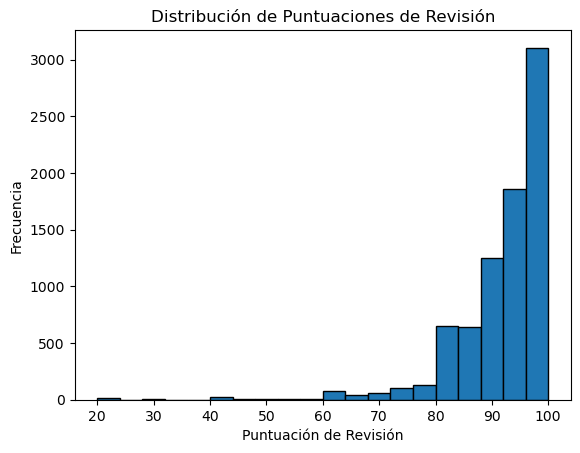

In [44]:
import matplotlib.pyplot as plt

plt.hist(df['Review_Scores_Rating'], bins=20, edgecolor='black')
plt.title('Distribución de Puntuaciones de Revisión')
plt.xlabel('Puntuación de Revisión')
plt.ylabel('Frecuencia')
plt.show()

In [45]:
idx_vals = df[df['Number_of_Reviews'] == 0].index

# Reemplaza NaN con 'No Reviews' en esos índices para la columna 'Review_Scores_Rating'
df.loc[idx_vals, 'Review_Scores_Rating'] = df.loc[idx_vals, 'Review_Scores_Rating'].fillna('No Reviews')

In [46]:
# Primero definimos la función que convertirá los valores a categorías
def convert_scores_buckets(val):
    if isinstance(val, str):  # Comprobamos si el valor es una cadena de texto
        return val
    elif val >= 95.0:
        return '95-100'
    elif 90.0 <= val < 95.0:
        return '90-94'
    elif 85.0 <= val < 90.0:
        return '85-89'
    elif 80.0 <= val < 85.0:
        return '80-84'
    elif 70.0 <= val < 80.0:
        return '70-79'
    elif 60.0 <= val < 70.0:
        return '60-69'
    elif 50.0 <= val < 60.0:
        return '50-59'
    elif 40.0 <= val < 50.0:
        return '40-49'
    elif 30.0 <= val < 40.0:
        return '30-39'
    elif 20.0 <= val < 30.0:
        return '20-29'
    elif 10.0 <= val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

# Luego, remplazamos los valores NaN por la cadena 'No Reviews'
df['Review_Scores_Rating'] = df['Review_Scores_Rating'].fillna('No Reviews')

# Ahora aplicamos la función para convertir las puntuaciones en categorías usando apply
df['Review_Scores_Rating'] = df['Review_Scores_Rating'].apply(convert_scores_buckets)

# Finalmente, imprimimos el número de registros restantes en el DataFrame
print('Number of remaining records:', len(df))


Number of remaining records: 10143


/var/folders/rt/k4y9ctx51rq87bymcp3c17d00000gn/T/ipykernel_62612/1443885190.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review_Scores_Rating'] = df['Review_Scores_Rating'].fillna('No Reviews')
/var/folders/rt/k4y9ctx51rq87bymcp3c17d00000gn/T/ipykernel_62612/1443885190.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review_Scores_Rating'] = df['Review_Scores_Rating'].apply(convert_scores_buckets)


Nuestro dataset está ahora limpio y ya no nos faltan valores.Tenemos en train 10143 de 10565 originales, por lo tanto hemos conservado una cantidad bastante buena de registros.Tenemos algunas columnas que tienen predictores categóricos, y scikit learn requiere campo númerico, por lo que deberemos convertirlas en variables ficticias.


In [47]:
# Filtra las columnas de tipo 'object'
object_columns = df.select_dtypes(include=['object'])

# Muestra la información de las columnas de tipo 'object'
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10143 entries, 1 to 10564
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Neighbourhood_Group_Cleansed  10143 non-null  object
 1   Property_Type                 10143 non-null  object
 2   Room_Type                     10143 non-null  object
 3   Bed_Type                      10143 non-null  object
 4   Review_Scores_Rating          10143 non-null  object
dtypes: object(5)
memory usage: 733.5+ KB


Variables Categoricas

Analizamos las variables categoricas, para hacernos una idea de como se distribuyen las clases o si existen datos anomalos. Va,ops a visualizar las variables y ver si tenemos añgun tipo de fallo o error.



In [48]:
df['Neighbourhood_Group_Cleansed'].value_counts(dropna=False)

Neighbourhood_Group_Cleansed
Centro                   5238
Chamberí                  744
Salamanca                 654
Arganzuela                616
Tetuán                    346
Moncloa - Aravaca         327
Retiro                    310
Latina                    292
Carabanchel               276
Chamartín                 261
Ciudad Lineal             232
Puente de Vallecas        156
Hortaleza                 144
Fuencarral - El Pardo     116
Usera                     113
San Blas - Canillejas      88
Barajas                    61
Villaverde                 60
Moratalaz                  52
Villa de Vallecas          32
Vicálvaro                  25
Name: count, dtype: int64

In [49]:
df['Property_Type'].value_counts(dropna=False)

Property_Type
Apartment             8428
House                  712
Condominium            257
Bed & Breakfast        247
Loft                   200
Other                  165
Dorm                    35
Guesthouse              32
Chalet                  19
Serviced apartment      12
Hostel                  12
Townhouse                6
Boutique hotel           4
Villa                    3
Casa particular          3
Earth House              2
Guest suite              2
Camper/RV                1
Timeshare                1
Bungalow                 1
Tent                     1
Name: count, dtype: int64

In [50]:
df['Room_Type'].value_counts(dropna=False)


Room_Type
Entire home/apt    6097
Private room       3904
Shared room         142
Name: count, dtype: int64

In [51]:
df['Bed_Type'].value_counts(dropna=False)


Bed_Type
Real Bed         9914
Pull-out Sofa     185
Futon              26
Couch              13
Airbed              5
Name: count, dtype: int64

In [52]:
def calc_smooth_mean(df, by, on, m):
    #Calcula la media global
    mean = df[on].mean()

    #Calculamos el número de valores y la media de cada grupo
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    #Media suavizadas
    smooth = (counts * means + m * mean) / (counts + m)

    #Reemplazamos
    return (df[by].map(smooth), smooth.to_dict())

In [53]:
metric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
attributes_columns = df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
encoder_dic_train = {}

for col in attributes_columns:
    df_copy = df.copy()  # Realiza una copia explícita
    df_copy.loc[:, f'{col}_mean_encoded'], encoder_dic_train[col] = calc_smooth_mean(df_copy, by=col, on='Price', m=10)
    df = df_copy.copy()  # Actualiza el DataFrame original con la copia modificada


In [54]:
#Encodeamos una variable de prueba
encoder_dic_train['Property_Type']

{'Apartment': 67.33736397437946,
 'Bed & Breakfast': 36.49290745452864,
 'Boutique hotel': 62.69122970099013,
 'Bungalow': 61.33429234671471,
 'Camper/RV': 71.15247416489653,
 'Casa particular': 57.898247370297064,
 'Chalet': 72.95438675220214,
 'Condominium': 62.137367849490126,
 'Dorm': 55.12616035141915,
 'Earth House': 58.05643465115515,
 'Guest suite': 58.22310131782182,
 'Guesthouse': 47.82564799556814,
 'Hostel': 56.66714617335736,
 'House': 57.50232301359261,
 'Loft': 75.53179626578029,
 'Other': 68.83244123322206,
 'Serviced apartment': 61.66714617335736,
 'Tent': 62.06156507398744,
 'Timeshare': 61.607019619441985,
 'Townhouse': 58.604825988366365,
 'Villa': 101.35978583183554}

In [55]:
df.head()
#comprobamos

,Price,ID,Host_ID,Neighbourhood_Group_Cleansed,Zipcode,Property_Type,Room_Type,Bathrooms,Bedrooms,Beds,...,Minimum_Nights,Availability_30,Number_of_Reviews,Review_Scores_Rating,Price_Log,Neighbourhood_Group_Cleansed_mean_encoded,Property_Type_mean_encoded,Room_Type_mean_encoded,Bed_Type_mean_encoded,Review_Scores_Rating_mean_encoded
1,21.00,8991818,46969485,Ciudad Lineal,28017,House,Private room,1.00,1.00,1.00,...,1,30,0,No Reviews,3.04,42.47,57.50,34.14,66.05,70.69
2,110.00,5310107,27508261,Centro,28014,Apartment,Entire home/apt,1.00,2.00,4.00,...,2,11,58,90-94,4.70,72.43,67.34,86.86,66.05,62.79
3,39.00,16144069,105344430,Centro,28013,Apartment,Entire home/apt,1.00,0.00,1.00,...,2,1,11,85-89,3.66,72.43,67.34,86.86,66.05,61.42
4,500.00,13445117,49509071,Retiro,28007,Apartment,Private room,2.00,1.00,1.00,...,1,29,1,No Reviews,6.21,72.84,67.34,34.14,66.05,70.69
6,50.00,2180688,5162711,Centro,28005,Apartment,Entire home/apt,1.00,1.00,2.00,...,2,3,134,90-94,3.91,72.43,67.34,86.86,66.05,62.79


In [56]:
# Lista de columnas que son de tipo 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Eliminar las columnas 'object' del DataFrame
df.drop(columns=object_columns, inplace=True)


In [57]:
#Muevo "Price_Log" a la primera columna:
df = df.set_index('Price_Log').reset_index()
df.head()

,Price_Log,Price,ID,Host_ID,Zipcode,Bathrooms,Bedrooms,Beds,Cleaning_Fee,Guests_Included,Minimum_Nights,Availability_30,Number_of_Reviews,Neighbourhood_Group_Cleansed_mean_encoded,Property_Type_mean_encoded,Room_Type_mean_encoded,Bed_Type_mean_encoded,Review_Scores_Rating_mean_encoded
0,3.04,21.00,8991818,46969485,28017,1.00,1.00,1.00,0.00,1,1,30,0,42.47,57.50,34.14,66.05,70.69
1,4.70,110.00,5310107,27508261,28014,1.00,2.00,4.00,50.00,4,2,11,58,72.43,67.34,86.86,66.05,62.79
2,3.66,39.00,16144069,105344430,28013,1.00,0.00,1.00,0.00,1,2,1,11,72.43,67.34,86.86,66.05,61.42
3,6.21,500.00,13445117,49509071,28007,2.00,1.00,1.00,0.00,1,1,29,1,72.84,67.34,34.14,66.05,70.69
4,3.91,50.00,2180688,5162711,28005,1.00,1.00,2.00,25.00,2,2,3,134,72.43,67.34,86.86,66.05,62.79


In [58]:
#Nos cargamos Price ya que vamos usar Price_Log que es una normal
new_columns_to_remove = ['Price']

columns_to_remove.extend(new_columns_to_remove)
df.drop(new_columns_to_remove, axis=1, inplace=True)
df.shape

(10143, 17)

In [59]:
df.head()

,Price_Log,ID,Host_ID,Zipcode,Bathrooms,Bedrooms,Beds,Cleaning_Fee,Guests_Included,Minimum_Nights,Availability_30,Number_of_Reviews,Neighbourhood_Group_Cleansed_mean_encoded,Property_Type_mean_encoded,Room_Type_mean_encoded,Bed_Type_mean_encoded,Review_Scores_Rating_mean_encoded
0,3.04,8991818,46969485,28017,1.00,1.00,1.00,0.00,1,1,30,0,42.47,57.50,34.14,66.05,70.69
1,4.70,5310107,27508261,28014,1.00,2.00,4.00,50.00,4,2,11,58,72.43,67.34,86.86,66.05,62.79
2,3.66,16144069,105344430,28013,1.00,0.00,1.00,0.00,1,2,1,11,72.43,67.34,86.86,66.05,61.42
3,6.21,13445117,49509071,28007,2.00,1.00,1.00,0.00,1,1,29,1,72.84,67.34,34.14,66.05,70.69
4,3.91,2180688,5162711,28005,1.00,1.00,2.00,25.00,2,2,3,134,72.43,67.34,86.86,66.05,62.79


Escalado

Hacemos el Escalado de caracteristicas pra asegurarnos que todas las caracterisitas tenga la misma escala, y puede facilitar la camporacion y el calculo del módelo.

In [60]:
from sklearn import preprocessing
y_train = df['Price_Log']     # nos quedamos con la objetivo, price
X_train = df.loc[:, df.columns != 'Price_Log']      # nos quedamos con el resto
feature_names = df.columns[df.columns!='Price_Log']

# Escalamos
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [61]:
X_train.describe().T
X_train.shape, y_train.shape, feature_names.shape

((10143, 16), (10143,), (16,))

## Transformaciones dataset de test

Vamos a dejar los datos de test preparados para ser utilizados en la validacion de cada uno de los modelos. Por ello tenemos que realizar las mismas trasnformaciones que hemos hecho en el dataset de train.



In [62]:
print(f'Dimensiones del dataset de test: {dft.shape}')

Dimensiones del dataset de test: (2642, 89)


In [63]:
dft['Zipcode'] = pd.to_numeric(dft['Zipcode'], errors='coerce').astype('Int64')


In [64]:
columns_to_keep = ['ID','Host_ID', 'Neighbourhood_Group_Cleansed', 'Zipcode',
       'Property_Type', 'Room_Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed_Type', 'Price','Cleaning_Fee', 'Minimum_Nights', 'Availability_30',
       'Number_of_Reviews','Review_Scores_Rating', 'Guests_Included']
cols = len(columns_to_keep)
print(f'Número de columnas totales = {cols}')

Número de columnas totales = 18


In [65]:
columns_to_remove = list(set(dft.columns.values) -  set(columns_to_keep))
print(f'Número de columnas a eliminar = {len(columns_to_remove)}')


Número de columnas a eliminar = 71


In [66]:
dft = dft.drop(columns=columns_to_remove)


In [67]:
print("Columnas después de la eliminación:", dft.columns)

Columnas después de la eliminación: Index(['ID', 'Host_ID', 'Neighbourhood_Group_Cleansed', 'Zipcode',
       'Property_Type', 'Room_Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed_Type', 'Price', 'Cleaning_Fee', 'Guests_Included',
       'Minimum_Nights', 'Availability_30', 'Number_of_Reviews',
       'Review_Scores_Rating'],
      dtype='object')


In [68]:
#Muevo "Price" a la primera columna:
dft = dft.set_index('Price').reset_index()

#Compruebo que se ha movido correctamente
dft.head(2)

,Price,ID,Host_ID,Neighbourhood_Group_Cleansed,Zipcode,Property_Type,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed_Type,Cleaning_Fee,Guests_Included,Minimum_Nights,Availability_30,Number_of_Reviews,Review_Scores_Rating
0,163.00,14624618,85138877,Salamanca,28001,Apartment,Entire home/apt,4,1.00,1.00,2.00,Real Bed,NaN,1,3,30,0,NaN
1,40.00,17853295,48345204,Centro,28005,Apartment,Private room,2,1.00,1.00,1.00,Pull-out Sofa,NaN,1,1,17,0,NaN


In [69]:
# Hacemos el logaritmo de Price

dft['Price_Log'] = np.log(dft['Price'])

# Quitamos acomodate

new_columns_to_remove = ['Accommodates']
columns_to_remove.extend(new_columns_to_remove)
dft.drop(new_columns_to_remove, axis=1, inplace=True)
dft.shape

(2642, 18)

In [70]:
dft.head(2)

,Price,ID,Host_ID,Neighbourhood_Group_Cleansed,Zipcode,Property_Type,Room_Type,Bathrooms,Bedrooms,Beds,Bed_Type,Cleaning_Fee,Guests_Included,Minimum_Nights,Availability_30,Number_of_Reviews,Review_Scores_Rating,Price_Log
0,163.00,14624618,85138877,Salamanca,28001,Apartment,Entire home/apt,1.00,1.00,2.00,Real Bed,NaN,1,3,30,0,NaN,5.09
1,40.00,17853295,48345204,Centro,28005,Apartment,Private room,1.00,1.00,1.00,Pull-out Sofa,NaN,1,1,17,0,NaN,3.69


In [71]:
#Valoreres NaN
for col in dft.columns:
    print(f'{col}, Nº valores vacios: {dft[col].isnull().sum()}')

Price, Nº valores vacios: 2
ID, Nº valores vacios: 0
Host_ID, Nº valores vacios: 0
Neighbourhood_Group_Cleansed, Nº valores vacios: 0
Zipcode, Nº valores vacios: 89
Property_Type, Nº valores vacios: 0
Room_Type, Nº valores vacios: 0
Bathrooms, Nº valores vacios: 7
Bedrooms, Nº valores vacios: 3
Beds, Nº valores vacios: 6
Bed_Type, Nº valores vacios: 0
Cleaning_Fee, Nº valores vacios: 1078
Guests_Included, Nº valores vacios: 0
Minimum_Nights, Nº valores vacios: 0
Availability_30, Nº valores vacios: 0
Number_of_Reviews, Nº valores vacios: 0
Review_Scores_Rating, Nº valores vacios: 549
Price_Log, Nº valores vacios: 2


In [72]:
original = len(dft)

# Cambia los nombres de las columnas a la versión con mayúsculas
dft = dft.dropna(how='any', subset=['Zipcode', 'Property_Type', 'Bedrooms', 'Beds', 'Bathrooms', 'Price','Price_Log',])
print('Number of NaN values removed:', original - len(dft))

# Imprime la cantidad de filas con valores inconsistentes
print('Number of Bedrooms 0:', len(dft[dft['Bedrooms'] == 0]))
print('Number of Beds 0:', len(dft[dft['Beds'] == 0]))


Number of NaN values removed: 100
Number of Bedrooms 0: 174
Number of Beds 0: 0


In [73]:
#Valoreres NaN
for col in dft.columns:
    print(f'{col}, Nº valores vacios: {dft[col].isnull().sum()}')

Price, Nº valores vacios: 0
ID, Nº valores vacios: 0
Host_ID, Nº valores vacios: 0
Neighbourhood_Group_Cleansed, Nº valores vacios: 0
Zipcode, Nº valores vacios: 0
Property_Type, Nº valores vacios: 0
Room_Type, Nº valores vacios: 0
Bathrooms, Nº valores vacios: 0
Bedrooms, Nº valores vacios: 0
Beds, Nº valores vacios: 0
Bed_Type, Nº valores vacios: 0
Cleaning_Fee, Nº valores vacios: 1034
Guests_Included, Nº valores vacios: 0
Minimum_Nights, Nº valores vacios: 0
Availability_30, Nº valores vacios: 0
Number_of_Reviews, Nº valores vacios: 0
Review_Scores_Rating, Nº valores vacios: 514
Price_Log, Nº valores vacios: 0


In [74]:
# Encuentra índices donde 'Number_of_Reviews' es 0
idx_vals = dft[dft['Number_of_Reviews'] == 0].index

# Reemplaza NaN con 'No Reviews' en esos índices para la columna 'Review_Scores_Rating'
dft.loc[idx_vals, 'Review_Scores_Rating'] = dft.loc[idx_vals, 'Review_Scores_Rating'].fillna('No Reviews')


In [75]:
# Luego, remplazamos los valores NaN por la cadena 'No Reviews'
dft['Review_Scores_Rating'] = dft['Review_Scores_Rating'].fillna('No Reviews')

# Ahora aplicamos la función para convertir las puntuaciones en categorías usando apply
dft['Review_Scores_Rating'] = dft['Review_Scores_Rating'].apply(convert_scores_buckets)

# Finalmente, imprimimos el número de registros restantes en el DataFrame
print('Number of remaining records:', len(dft))

Number of remaining records: 2542


In [76]:
dft['Cleaning_Fee'] = dft['Cleaning_Fee'].fillna(0)


In [77]:
max_nights = 30

# Actualiza los valores en la columna 'Minimum Nights' que exceden el valor máximo
df.loc[df['Minimum_Nights'] > max_nights, 'Minimum_Nights'] = max_nights

In [78]:
# Crea una máscara para los Zipcodes que son menores que 28000 o mayores que 29000
mask = (df['Zipcode'] < 28000) | (df['Zipcode'] > 29000)

# Utiliza .loc para actualizar los valores en 'Zipcode' donde la máscara es verdadera
df.loc[mask, 'Zipcode'] = 28000

# Cuenta el número de filas afectadas
count = mask.sum()

print(f'Número de filas con Zipcode modificado: {count}')

Número de filas con Zipcode modificado: 0


In [79]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = dft.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return (dft[by].map(smooth), smooth.to_dict())

In [80]:
metric_columns = dft.select_dtypes(include=['float64', 'int64']).columns.tolist()
attributes_columns = dft.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
encoder_dic_train = {}

for col in attributes_columns:
    dft_copy = dft.copy()  # Realiza una copia explícita
    dft_copy.loc[:, f'{col}_mean_encoded'], encoder_dic_train[col] = calc_smooth_mean(dft_copy, by=col, on='Price', m=10)
    dft = dft_copy.copy()  # Actualiza el DataFrame original con la copia modificada

In [81]:
# Lista de columnas que son de tipo 'object'
object_columns = dft.select_dtypes(include=['object']).columns

# Eliminar las columnas 'object' del DataFrame
dft.drop(columns=object_columns, inplace=True)

In [82]:
#Muevo "Price" a la primera columna:
dft = dft.set_index('Price_Log').reset_index()

In [83]:
new_columns_to_remove = ['Price']

columns_to_remove.extend(new_columns_to_remove)
dft.drop(new_columns_to_remove, axis=1, inplace=True)
dft.shape

(2542, 17)

In [84]:
dft.head()

,Price_Log,ID,Host_ID,Zipcode,Bathrooms,Bedrooms,Beds,Cleaning_Fee,Guests_Included,Minimum_Nights,Availability_30,Number_of_Reviews,Neighbourhood_Group_Cleansed_mean_encoded,Property_Type_mean_encoded,Room_Type_mean_encoded,Bed_Type_mean_encoded,Review_Scores_Rating_mean_encoded
0,5.09,14624618,85138877,28001,1.00,1.00,2.00,0.00,1,3,30,0,89.34,68.37,88.01,66.98,70.68
1,3.69,17853295,48345204,28005,1.00,1.00,1.00,0.00,1,1,17,0,74.42,68.37,33.18,55.80,70.68
2,4.01,16199300,105797031,28012,1.00,1.00,2.00,25.00,2,2,14,12,74.42,68.37,88.01,66.98,59.57
3,4.17,4804963,1422050,28012,1.00,0.00,2.00,0.00,2,1,8,87,74.42,68.37,88.01,66.98,67.77
4,2.71,16248404,102141233,28031,2.00,1.00,1.00,0.00,1,1,3,3,50.77,47.39,33.18,66.98,59.57


In [85]:
print(f'Dimensiones del dataset de test: {dft.shape}')

Dimensiones del dataset de test: (2542, 17)


In [86]:
#Escalado

from sklearn import preprocessing
y_test = dft['Price_Log']     # nos quedamos con la objetivo, price
X_test = dft.loc[:, dft.columns != 'Price_Log']      # nos quedamos con el resto
feature_names = dft.columns[dft.columns!='Price_Log']

# Escalamos
XtestScaled = scaler.transform(X_test)

### Selección Caracteristicas

In [87]:
print(f'Dimensiones datos para train: Xtrain = {X_train.shape}, ytrain = {y_train.shape}')
print(f'Dimensiones datos para test: Xtest = {X_test.shape}, ytest = {y_test.shape}')

Dimensiones datos para train: Xtrain = (10143, 16), ytrain = (10143,)
Dimensiones datos para test: Xtest = (2542, 16), ytest = (2542,)


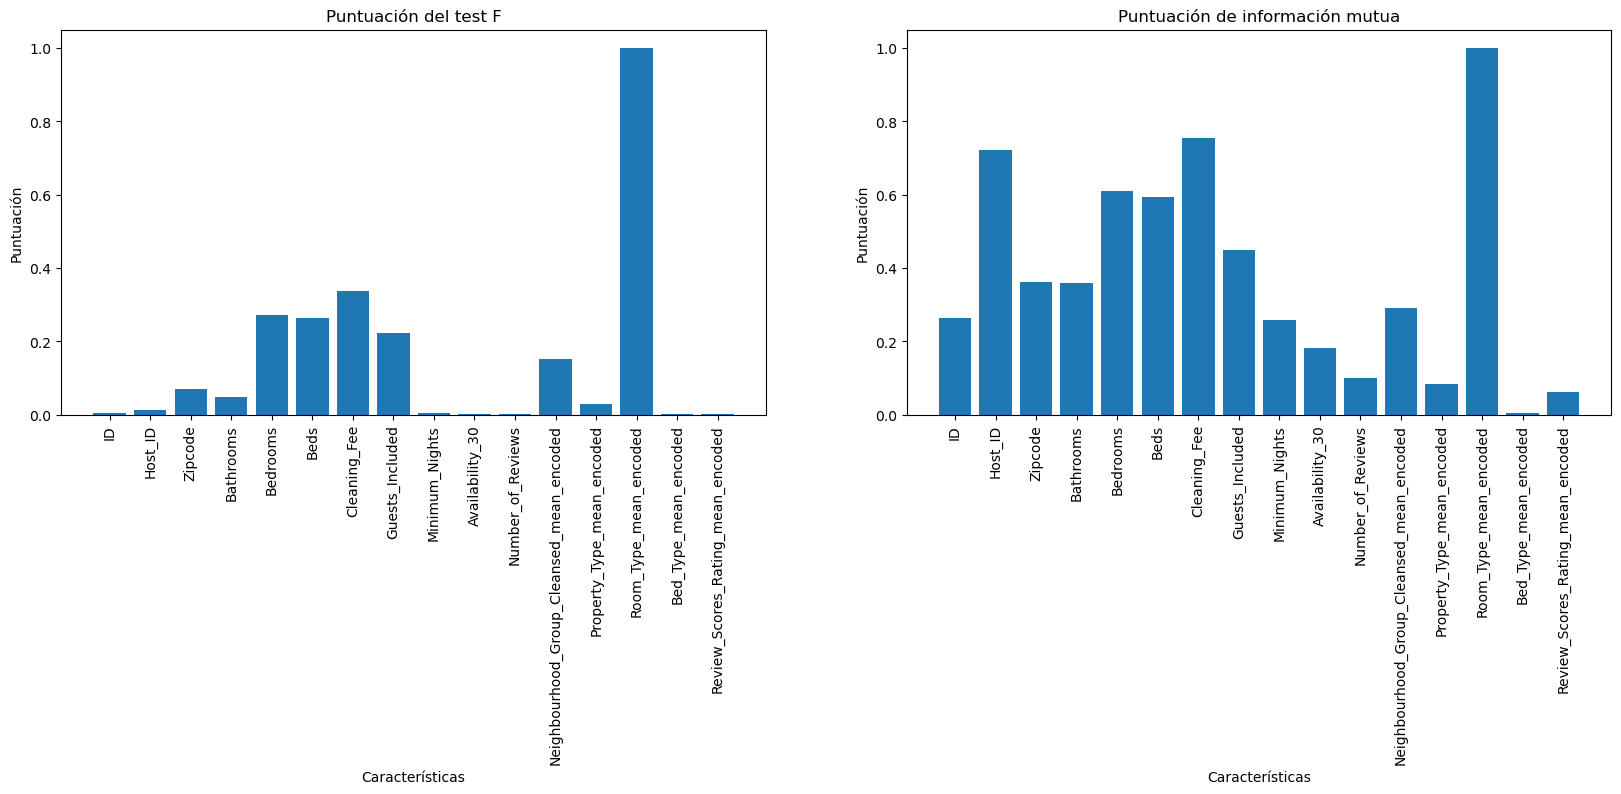

In [88]:
from sklearn.feature_selection import f_regression, mutual_info_regression

y = df['Price_Log']

# Seleccionar todas las demás columnas como características (X)
X = df.drop('Price_Log', axis=1)

feature_names = X.columns

# Realizar cálculos
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# Realizar gráficos
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.bar(range(X.shape[1]), f_test, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Características')
plt.ylabel('Puntuación')
plt.title('Puntuación del test F')

plt.subplot(1, 2, 2)
plt.bar(range(X.shape[1]), mi, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Características')
plt.ylabel('Puntuación')
plt.title('Puntuación de información mutua')

plt.show()


# Metodos Embedded

In [89]:
# Hacemos check de que x_train e y_train tengan la misma longitud (es un check) 

print("XtrainScaled length:", len(XtrainScaled))
print("y_train length:", len(y_train))

XtrainScaled length: 10143
y_train length: 10143


### Vamos a usar la capacidad de Lasso para selecionar variables.

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.16237767391887217; total time=   0.0s
[CV] END ..........................alpha=0.162

[CV] END .............................alpha=20.6913808111479; total time=   0.0s
[CV] END .............................alpha=20.6913808111479; total time=   0.0s
[CV] END .............................alpha=20.6913808111479; total time=   0.0s
[CV] END .............................alpha=20.6913808111479; total time=   0.0s
[CV] END .............................alpha=20.6913808111479; total time=   0.0s
[CV] END .............................alpha=20.6913808111479; total time=   0.0s
[CV] END .............................alpha=20.6913808111479; total time=   0.0s
[CV] END .............................alpha=20.6913808111479; total time=   0.0s
[CV] END .............................alpha=20.6913808111479; total time=   0.0s
[CV] END ............................alpha=33.59818286283781; total time=   0.0s
[CV] END ............................alpha=33.59818286283781; total time=   0.0s
[CV] END ............................alpha=33.59818286283781; total time=   0.0s
[CV] END ...................

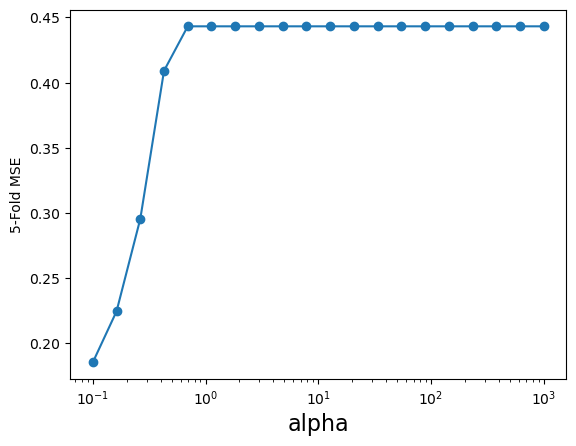

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,3,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [91]:

from sklearn.metrics import mean_squared_error, r2_score

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print('R^2 (train): %0.3g' % r2_score(y_train,ytrainLasso))
print('R^2 (test) : %0.3g' % r2_score(y_test,ytestLasso))


w = lasso.coef_
for f,wi in zip(feature_names,w):
   print(f,wi)

MSE Modelo Lasso (train): 0.185
MSE Modelo Lasso (test) : 0.181
RMSE Modelo Lasso (train): 0.43
RMSE Modelo Lasso (test) : 0.425
R^2 (train): 0.583
R^2 (test) : 0.605
ID -0.0
Host_ID -0.0
Zipcode -0.0
Bathrooms 0.0
Bedrooms 0.09997039389693206
Beds 0.012844576800344697
Cleaning_Fee 0.06022007187799189
Guests_Included 0.0
Minimum_Nights -0.0
Availability_30 0.0
Number_of_Reviews -0.0
Neighbourhood_Group_Cleansed_mean_encoded 0.0473525106967538
Property_Type_mean_encoded 0.0
Room_Type_mean_encoded 0.3021516689847852
Bed_Type_mean_encoded 0.0
Review_Scores_Rating_mean_encoded 0.0


## Regresión lineal con regularización Ridge


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.16237767391887217; total time=   0.0s
[CV] END ..........................alpha=0.162

[CV] END ...........................alpha=233.57214690901213; total time=   0.0s
[CV] END ............................alpha=379.2690190732246; total time=   0.0s
[CV] END ............................alpha=379.2690190732246; total time=   0.0s
[CV] END ............................alpha=379.2690190732246; total time=   0.0s
[CV] END ............................alpha=379.2690190732246; total time=   0.0s
[CV] END ............................alpha=379.2690190732246; total time=   0.0s
[CV] END ............................alpha=379.2690190732246; total time=   0.0s
[CV] END ............................alpha=379.2690190732246; total time=   0.0s
[CV] END ............................alpha=379.2690190732246; total time=   0.0s
[CV] END ............................alpha=379.2690190732246; total time=   0.0s
[CV] END ............................alpha=379.2690190732246; total time=   0.0s
[CV] END ............................alpha=615.8482110660261; total time=   0.0s
[CV] END ...................

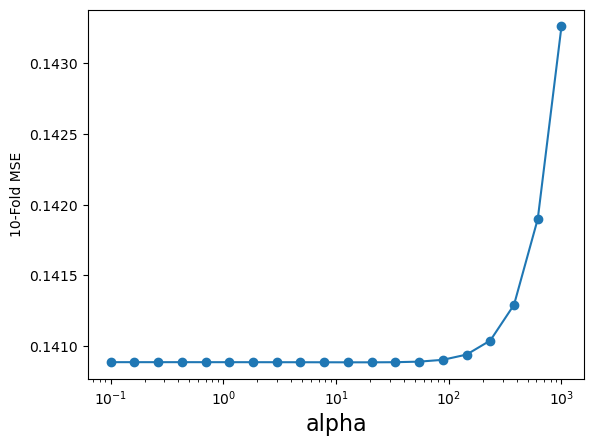

In [92]:
from sklearn.linear_model import Ridge

# Define los valores de alpha para probar
alpha_vector = np.logspace(-1, 3, 20)
param_grid = {'alpha': alpha_vector}

# Configura y ejecuta la búsqueda en cuadrícula con validación cruzada
grid = GridSearchCV(Ridge(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=10, verbose=2)
grid.fit(XtrainScaled, y_train)

# Imprime los mejores resultados de la validación cruzada
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Visualización de los resultados
# Recuerda que las puntuaciones son negativas debido a la convención de scikit-learn
scores = -1 * np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('alpha', fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()


In [93]:
from sklearn.linear_model import Ridge

# Asumiendo que ya has realizado una búsqueda en cuadrícula (GridSearchCV) para Ridge
# y que tienes los conjuntos de datos XtrainScaled, y_train, XtestScaled, y_test
alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha=alpha_optimo).fit(XtrainScaled, y_train)

# Predicciones
ytrainRidge = ridge.predict(XtrainScaled)
ytestRidge = ridge.predict(XtestScaled)

# Cálculo de MSE
mseTrainModelRidge = mean_squared_error(y_train, ytrainRidge)
mseTestModelRidge = mean_squared_error(y_test, ytestRidge)

# Imprimir MSE y RMSE
print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModelRidge)
print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))
print('RMSE Modelo Ridge (test) : %0.3g' % np.sqrt(mseTestModelRidge))

# Imprimir R^2
print('R^2 (train): %0.3g' % r2_score(y_train, ytrainRidge))
print('R^2 (test) : %0.3g' % r2_score(y_test, ytestRidge))

# Imprimir coeficientes
w = ridge.coef_
for f, wi in zip(feature_names, w):
    print(f, wi)


MSE Modelo Ridge (train): 0.14
MSE Modelo Ridge (test) : 0.609
RMSE Modelo Ridge (train): 0.374
RMSE Modelo Ridge (test) : 0.781
R^2 (train): 0.684
R^2 (test) : -0.333
ID -0.05202081080343378
Host_ID -0.0011217648454781338
Zipcode -0.014696547684043708
Bathrooms 0.046660898967851104
Bedrooms 0.12448274866338853
Beds 0.022912008216098182
Cleaning_Fee 0.0880883335590256
Guests_Included 0.042860691102998845
Minimum_Nights -0.033076707863267205
Availability_30 0.0846506728777283
Number_of_Reviews -0.04122750452901092
Neighbourhood_Group_Cleansed_mean_encoded 0.12262960307577128
Property_Type_mean_encoded -0.012234727751488723
Room_Type_mean_encoded 0.3858449753988993
Bed_Type_mean_encoded 0.01204545661826551
Review_Scores_Rating_mean_encoded 0.09269459325778942


## Arbol de decision

best mean cross-validation score: 0.675
best parameters: {'max_depth': 7}


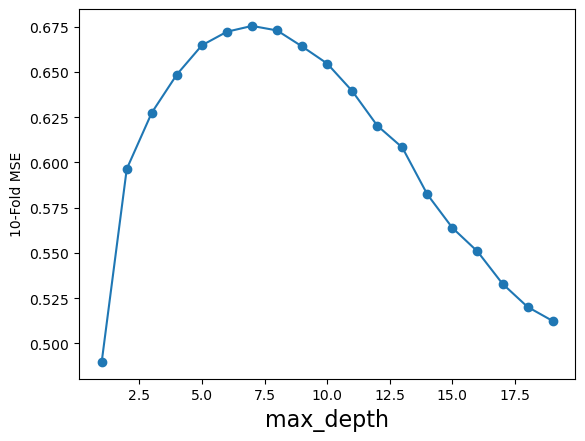

In [94]:
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,20)
cv = 10
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = cv)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel(f'{cv}-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [95]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Score Train: ",treeModel.score(X_train,y_train))
print("Score Test: ",treeModel.score(X_test,y_test))

Score Train:  0.7272045300443057
Score Test:  0.6451025936612433


## Random Forest

best mean cross-validation score: 0.749
best parameters: {'max_depth': 14}


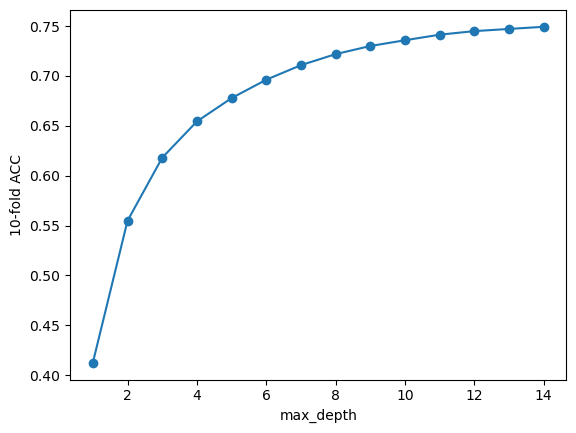

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

cv = 10

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=cv, n_jobs=4) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel(f'{cv}-fold ACC')

plt.show()

In [97]:
maxDepthOptimo = grid.best_params_['max_depth']
rfModel = RandomForestRegressor(max_depth=14,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Score Train: ",rfModel.score(X_train,y_train))
print("Score Test: ",rfModel.score(X_test,y_test))


Score Train:  0.8924193555351109
Score Test:  0.7589913342141489


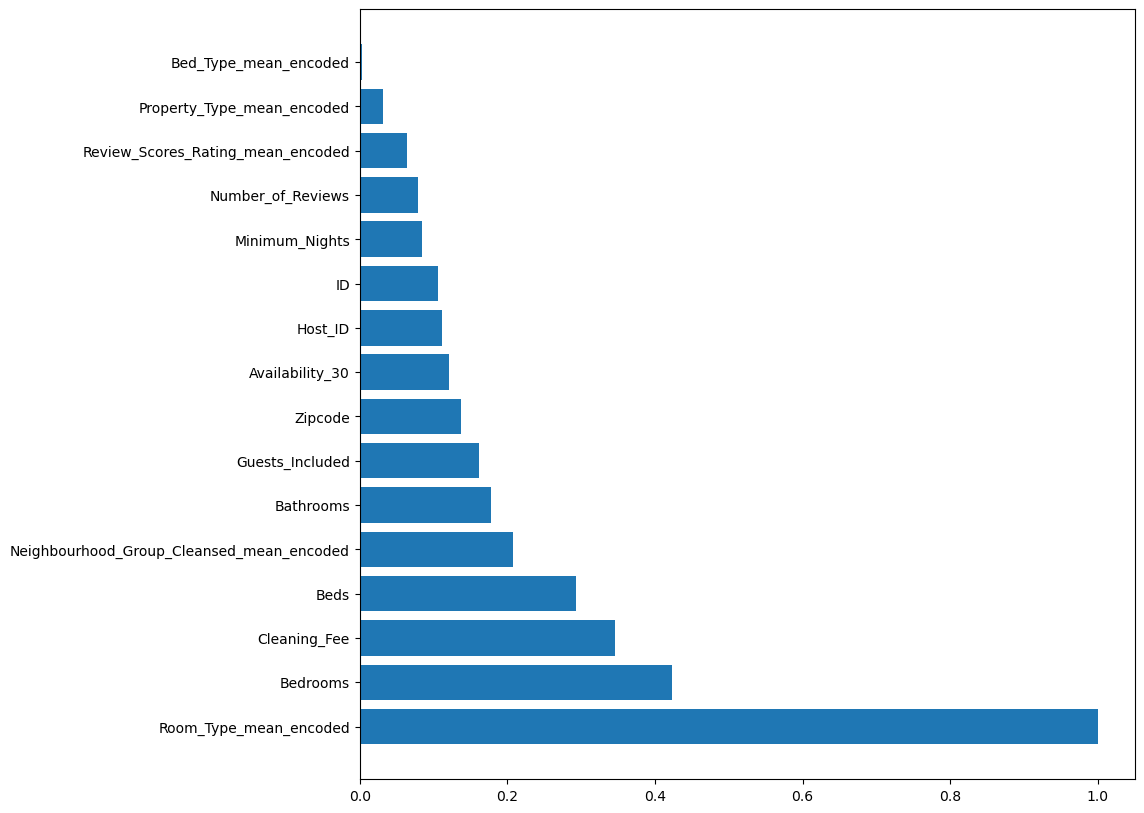

In [105]:
importances = rfModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## Boosted Trees


In [107]:
from sklearn.ensemble import GradientBoostingRegressor

cv = 10

Niterations = [20, 25, 50,100] 
learningRate = [0.1,0.05, 0.01]
# mantenemos max_depth estático: max_depth=3,5

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=5), param_grid=param_grid, cv = cv, n_jobs=4)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.752
best parameters: {'learning_rate': 0.1, 'n_estimators': 100}


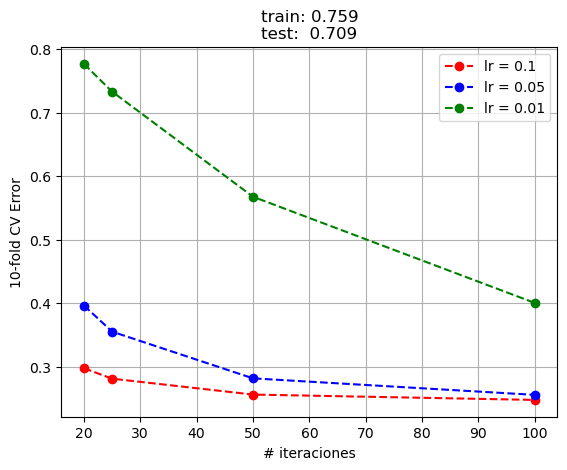

In [108]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel(f'{cv}-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

La gráfica muestra el desempeño de un algoritmo boostedtrees durante el proceso de entrenamiento, evaluado mediante el error de validación cruzada (10-fold CV Error) en función del número de iteraciones. Se exploran tres tasas de aprendizaje diferentes:

- **lr = 0.1 (Rojo)**
- **lr = 0.05 (Azul)**
- **lr = 0.01 (Verde)**

Observaciones:

- El modelo con **lr = 0.01** demuestra una mejora sostenida en el rendimiento a medida que aumenta el número de iteraciones, lo que indica que una tasa de aprendizaje más baja pero constante puede ser más efectiva para la convergencia óptima del modelo en este contexto.
- La tasa de **lr = 0.05** logra un avance más rápido inicialmente en comparación con **lr = 0.01**, pero su progreso se estabiliza más temprano, lo que podría sugerir que el modelo alcanza su límite de aprendizaje más rápido.
- La tasa de **lr = 0.1** exhibe la mejora más rápida al principio; sin embargo, muestra indicios de estancamiento o posible sobreajuste, ya que el error de validación cruzada se estabiliza y no disminuye con más iteraciones.

Los valores de rendimiento en el conjunto de entrenamiento y prueba para la tasa de aprendizaje **lr = 0.01** son:
- **train: 0.759**
- **test: 0.709**

Esto sugiere que el modelo con **lr = 0.01** actúa ligeramente mejor en el conjunto de entrenamiento en comparación con el conjunto de prueba, lo cual podría indicar un sobreajuste mínimo. No obstante, la pequeña diferencia entre estas métricas sugiere que el modelo tiene una capacidad razonable para generalizar a nuevos datos.


### SVM (Support Vector Machine)

In [110]:
from sklearn.svm import SVR

# Paso 2:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 10, verbose=2)
grid.fit(XtrainScaled, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] END ................................C=0.01, gamma=1e-05; total time=   1.9s
[CV] END ................................C=0.01, gamma=1e-05; total time=   1.9s
[CV] END ................................C=0.01, gamma=1e-05; total time=   2.0s
[CV] END ................................C=0.01, gamma=1e-05; total time=   1.9s
[CV] END ................................C=0.01, gamma=1e-05; total time=   1.9s
[CV] END ................................C=0.01, gamma=1e-05; total time=   1.9s
[CV] END ................................C=0.01, gamma=1e-05; total time=   1.9s
[CV] END ................................C=0.01, gamma=1e-05; total time=   1.9s
[CV] END ................................C=0.01, gamma=1e-05; total time=   1.9s
[CV] END ................................C=0.01, gamma=1e-05; total time=   1.9s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   1.9s
[CV] END ................C=0.01, gamma=7.19685

[CV] END C=0.027825594022071243, gamma=0.0005179474679231213; total time=   1.8s
[CV] END C=0.027825594022071243, gamma=0.0005179474679231213; total time=   1.8s
[CV] END C=0.027825594022071243, gamma=0.0005179474679231213; total time=   1.8s
[CV] END C=0.027825594022071243, gamma=0.0005179474679231213; total time=   1.8s
[CV] END C=0.027825594022071243, gamma=0.0005179474679231213; total time=   1.8s
[CV] END C=0.027825594022071243, gamma=0.0005179474679231213; total time=   1.8s
[CV] END C=0.027825594022071243, gamma=0.0005179474679231213; total time=   1.8s
[CV] END C=0.027825594022071243, gamma=0.0005179474679231213; total time=   1.7s
[CV] END C=0.027825594022071243, gamma=0.0005179474679231213; total time=   1.8s
[CV] END .C=0.027825594022071243, gamma=0.003727593720314938; total time=   1.6s
[CV] END .C=0.027825594022071243, gamma=0.003727593720314938; total time=   1.6s
[CV] END .C=0.027825594022071243, gamma=0.003727593720314938; total time=   1.6s
[CV] END .C=0.02782559402207

[CV] END ...C=0.0774263682681127, gamma=0.026826957952797246; total time=   1.6s
[CV] END ...C=0.0774263682681127, gamma=0.026826957952797246; total time=   1.6s
[CV] END ...C=0.0774263682681127, gamma=0.026826957952797246; total time=   1.6s
[CV] END ...C=0.0774263682681127, gamma=0.026826957952797246; total time=   1.6s
[CV] END ...C=0.0774263682681127, gamma=0.026826957952797246; total time=   1.6s
[CV] END ...C=0.0774263682681127, gamma=0.026826957952797246; total time=   1.6s
[CV] END ...C=0.0774263682681127, gamma=0.026826957952797246; total time=   1.6s
[CV] END ....C=0.0774263682681127, gamma=0.19306977288832497; total time=   1.6s
[CV] END ....C=0.0774263682681127, gamma=0.19306977288832497; total time=   1.6s
[CV] END ....C=0.0774263682681127, gamma=0.19306977288832497; total time=   1.7s
[CV] END ....C=0.0774263682681127, gamma=0.19306977288832497; total time=   1.6s
[CV] END ....C=0.0774263682681127, gamma=0.19306977288832497; total time=   1.6s
[CV] END ....C=0.07742636826

[CV] END .....C=0.21544346900318834, gamma=1.389495494373136; total time=   2.0s
[CV] END .....C=0.21544346900318834, gamma=1.389495494373136; total time=   1.8s
[CV] END .....C=0.21544346900318834, gamma=1.389495494373136; total time=   1.8s
[CV] END .....C=0.21544346900318834, gamma=1.389495494373136; total time=   1.8s
[CV] END .....C=0.21544346900318834, gamma=1.389495494373136; total time=   1.8s
[CV] END ..................C=0.21544346900318834, gamma=10.0; total time=   2.0s
[CV] END ..................C=0.21544346900318834, gamma=10.0; total time=   2.0s
[CV] END ..................C=0.21544346900318834, gamma=10.0; total time=   2.0s
[CV] END ..................C=0.21544346900318834, gamma=10.0; total time=   2.0s
[CV] END ..................C=0.21544346900318834, gamma=10.0; total time=   1.9s
[CV] END ..................C=0.21544346900318834, gamma=10.0; total time=   2.0s
[CV] END ..................C=0.21544346900318834, gamma=10.0; total time=   1.9s
[CV] END ..................C

[CV] END ..................C=1.6681005372000592, gamma=1e-05; total time=   1.7s
[CV] END ..................C=1.6681005372000592, gamma=1e-05; total time=   1.8s
[CV] END ..................C=1.6681005372000592, gamma=1e-05; total time=   1.8s
[CV] END ..C=1.6681005372000592, gamma=7.196856730011514e-05; total time=   1.6s
[CV] END ..C=1.6681005372000592, gamma=7.196856730011514e-05; total time=   1.6s
[CV] END ..C=1.6681005372000592, gamma=7.196856730011514e-05; total time=   1.6s
[CV] END ..C=1.6681005372000592, gamma=7.196856730011514e-05; total time=   1.6s
[CV] END ..C=1.6681005372000592, gamma=7.196856730011514e-05; total time=   1.6s
[CV] END ..C=1.6681005372000592, gamma=7.196856730011514e-05; total time=   1.6s
[CV] END ..C=1.6681005372000592, gamma=7.196856730011514e-05; total time=   1.7s
[CV] END ..C=1.6681005372000592, gamma=7.196856730011514e-05; total time=   1.6s
[CV] END ..C=1.6681005372000592, gamma=7.196856730011514e-05; total time=   1.7s
[CV] END ..C=1.6681005372000

[CV] END ..C=4.6415888336127775, gamma=0.0005179474679231213; total time=   1.7s
[CV] END ...C=4.6415888336127775, gamma=0.003727593720314938; total time=   1.8s
[CV] END ...C=4.6415888336127775, gamma=0.003727593720314938; total time=   1.8s
[CV] END ...C=4.6415888336127775, gamma=0.003727593720314938; total time=   1.8s
[CV] END ...C=4.6415888336127775, gamma=0.003727593720314938; total time=   1.8s
[CV] END ...C=4.6415888336127775, gamma=0.003727593720314938; total time=   1.8s
[CV] END ...C=4.6415888336127775, gamma=0.003727593720314938; total time=   1.8s
[CV] END ...C=4.6415888336127775, gamma=0.003727593720314938; total time=   1.8s
[CV] END ...C=4.6415888336127775, gamma=0.003727593720314938; total time=   1.8s
[CV] END ...C=4.6415888336127775, gamma=0.003727593720314938; total time=   1.7s
[CV] END ...C=4.6415888336127775, gamma=0.003727593720314938; total time=   1.8s
[CV] END ...C=4.6415888336127775, gamma=0.026826957952797246; total time=   2.4s
[CV] END ...C=4.641588833612

[CV] END ....C=12.915496650148826, gamma=0.19306977288832497; total time=   7.4s
[CV] END ....C=12.915496650148826, gamma=0.19306977288832497; total time=   7.1s
[CV] END ....C=12.915496650148826, gamma=0.19306977288832497; total time=   7.0s
[CV] END ....C=12.915496650148826, gamma=0.19306977288832497; total time=   6.8s
[CV] END ....C=12.915496650148826, gamma=0.19306977288832497; total time=   6.9s
[CV] END ....C=12.915496650148826, gamma=0.19306977288832497; total time=   6.9s
[CV] END ....C=12.915496650148826, gamma=0.19306977288832497; total time=   6.8s
[CV] END ....C=12.915496650148826, gamma=0.19306977288832497; total time=   6.7s
[CV] END ....C=12.915496650148826, gamma=0.19306977288832497; total time=   6.5s
[CV] END ......C=12.915496650148826, gamma=1.389495494373136; total time=   4.2s
[CV] END ......C=12.915496650148826, gamma=1.389495494373136; total time=   4.1s
[CV] END ......C=12.915496650148826, gamma=1.389495494373136; total time=   4.1s
[CV] END ......C=12.91549665

[CV] END ....................C=35.93813663804626, gamma=10.0; total time=   5.0s
[CV] END ....................C=35.93813663804626, gamma=10.0; total time=   5.2s
[CV] END ....................C=35.93813663804626, gamma=10.0; total time=   4.9s
[CV] END ....................C=35.93813663804626, gamma=10.0; total time=   5.0s
[CV] END ....................C=35.93813663804626, gamma=10.0; total time=   4.8s
[CV] END ....................C=35.93813663804626, gamma=10.0; total time=   4.9s
[CV] END ....................C=35.93813663804626, gamma=10.0; total time=   5.2s
[CV] END ...............................C=100.0, gamma=1e-05; total time=   1.6s
[CV] END ...............................C=100.0, gamma=1e-05; total time=   1.6s
[CV] END ...............................C=100.0, gamma=1e-05; total time=   1.6s
[CV] END ...............................C=100.0, gamma=1e-05; total time=   1.6s
[CV] END ...............................C=100.0, gamma=1e-05; total time=   1.8s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             verbose=2)

In [111]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Train: %0.2f'%svmModel.score(XtrainScaled,y_train))
print('Test: %0.2f'%svmModel.score(XtestScaled,y_test))

Train: 0.78
Test: 0.74


SPOILER: Tarda cercano a infinito
Train: 0.78
Test: 0.74

### 5. Conclusión:

| Modelo                     | Train                | Test                |
|----------------------------|----------------------|---------------------|
| Regresión lineal con Ridge | R2: 0.684 RSME: 0.374| R2: -0.33 RMSE: 0.781|
| Regresión lineal con Lasso | R2: 0.583 RMSE: 0.43 | R2: 0.605 RMSE: 0.425 |
| Árboles de decisión        | 0.7272               | 0.6451              |
| Random Forest              | 0.8924               | 0.7589              |
| Boosted Trees              | 0.759                | 0.709               |
| SVM                        | 0.78                 | 0.74                 |

### Conclusión de los Modelos

### Observaciones de Comparativa de Modelos

- **Regresión Lineal con Ridge**:
  - Buen rendimiento en el conjunto de entrenamiento con un `R2` de 0.684.
  - Rendimiento negativo en el conjunto de prueba con un `R2` de -0.33, indicando un posible sobreajuste y una mala generalización.

- **Regresión Lineal con Lasso**:
  - Rendimiento moderado en el conjunto de entrenamiento con un `R2` de 0.583.
  - Mejor generalización que Ridge, con un `R2` en el conjunto de prueba de 0.605, que es superior al rendimiento de entrenamiento.

- **Árboles de Decisión**:
  - Rendimiento decente en el conjunto de entrenamiento con un `R2` de 0.7272.
  - Caída en el rendimiento al pasar al conjunto de prueba con un `R2` de 0.6451, lo que sugiere un cierto grado de sobreajuste.

- **Random Forest**:
  - Alto rendimiento en el conjunto de entrenamiento con un `R2` de 0.8924.
  - Rendimiento sólido en el conjunto de prueba con un `R2` de 0.7589, aunque la disminución sugiere sobreajuste, sigue siendo el modelo con mejor desempeño en el conjunto de prueba.

- **Boosted Trees**:
  - Buen rendimiento en el conjunto de entrenamiento con un `R2` de 0.759.
  - Buena generalización con un `R2` de 0.709 en el conjunto de prueba, indicando una adaptación equilibrada.

- **SVM**:
  - Muy buen rendimiento en el conjunto de entrenamiento con un `R2` de 0.78.
  - El rendimiento en el conjunto de prueba es bastante alto con un `R2` de 0.74, sugiriendo que el modelo SVM generaliza casi tan bien como Random Forest, pero con una diferencia menor entre entrenamiento y prueba, lo que podría indicar un mejor equilibrio entre sesgo y varianza.

En general, los modelos de ensamble (Random Forest y Boosted Trees) y SVM muestran una mejor capacidad de generalización comparados con los modelos lineales, aunque con signos de sobreajuste en Random Forest. La selección del modelo óptimo dependerá de la importancia relativa de la precisión frente a la a la interpretabilidad y el tiempo de entrenamiento/predicción.



## Mejoras

1. **Análisis de Características**: Revisar la relevancia de las características utilizadas en los modelos y realizar selección de características para eliminar las no informativas.Eliminas los datos de ID, ID_HOST.
2. **Creación nuevas variables**: Experimentar con la creación de nuevas variabñes que puedan representar mejor las relaciones no lineales y las interacciones entre variables.
3. **Análisis de Residuos**: Realizar un análisis de residuos para entender mejor los errores del modelo y identificar posibles patrones.
4. **Datos Adicionales**: Con mas datos podemos mejorar el módelo
5. **Regularización**: Experimentar con diferentes valores de regularización en los modelos lineales con Ridge y Lasso para ver si hay una mejora en el rendimiento.69. **Transformaciones de Datos**: Aplicar transformaciones a los datos (como logarítmica, cuadrática, etc.) para mejorar la relación lineal entre características y etiquetas.